# Lead Scoring - Case Study

### Problem Statement

X Education, an online course provider, faces challenges with its lead conversion process. Despite attracting many leads, the conversion rate is low (around 30%). The company wants to identify potential leads, referred to as 'Hot Leads,' to increase the lead conversion rate. The goal is to build a model that assigns a lead score to each prospect, allowing the sales team to focus on high-potential leads.


### Business Goal

1. Build a logistic regression model to assign lead scores (0 to 100) based on historical data.
2. Increase the lead conversion rate to approximately 80% by targeting the most promising leads.
3. Provide recommendations on adjusting the model to handle potential future changes as outlined in a separate document.

### Steps followed for doing the Logistic Regression Analysis

#### [Exploratory Data Analysis](#step1)

1. [Importing required libraries for EDA](#step1.1)
2. [Data Sourcing](#step1.2)
3. [Understanding the data](#step1.3)
4. [Data Cleaning](#step1.4)
5. [Data Analysis](#step1.5)

#### [Step 2: Preparing the data for modelling](#step2)

1. [Importing required libraries for Data Modelling](#step2.1)
2. [Convert the categorical feature into binary data by using dummy variables](#step2.2)
2. [Split the data into train and test](#step2.3)
3. [Scale the features](#step2.4)

#### [Step 3: Developing the model](#step3)

1. [Divide the independent variables and dependent variable](#step3.1)
2. [Auto-Select the independent features for the model](#step3.2)
3. [Fine-tune the model](#step3.3)


#### [Step 4: Prediction and evaluation on the test set](#step4)

1. [Rescale the test set](#step4.1)
2. [Model evaluation using test dataset](#step4.2)

#### [Step 5: Model Summary](#step5)


### <a id='step1'></a> Exploratory Data Analysis on the dataset

#### <a id='step1.1'></a> Importing required libraries for EDA

In [1]:
# Supressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the pandas and numpy for analysis the data

import numpy as np
import pandas as pd

In [3]:
# Importing the matplotlib and seaborn for data analysis

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Data Frame display settings

pd.set_option("display.max_rows", None, "display.max_columns", None)

#### <a id='step1.2'></a> Data Sourcing

In [5]:
# Reading the dataset provided

leads_data = pd.read_csv('Leads.csv')

#### <a id='step1.3'></a> Understading the data

In [6]:
# Checking the number of rows and columns in the dataset

leads_data.shape

(9240, 37)

In [7]:
# Checking the top 5 rows in the dataset

leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Checking the bottom 5 rows in the dataset

leads_data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [9]:
# Checking the dataset infomation

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Checking the statistical description of the dataset

leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Inference out of the details gathered above

1. There are 9240 records and 37 features in the leads dataset
2. There are quite a few columns with NULL values
3. There are 7 numerical data
4. There are 30 non-numerical data
5. There is no false headers/junk data found. The top rows of the application data looks clean
6. There is no summary/junk data found. The bottom rows of the application data looks clean

We will work further with the above data to facilitate the analysis

#### <a id='step1.4'></a> Data Cleaning

In [11]:
# Checking if there are any duplicate records

# Check for duplicates
duplicates_identified = leads_data.duplicated()

# Check if there are any duplicates
if duplicates_identified.any():
    print("There are duplicates in the Data.")
else:
    print("There are no duplicates in the Data.")

There are no duplicates in the Data.


In [12]:
# Percentage of null values exists in all the columns

null_values_summary = (leads_data.isnull().mean() * 100).sort_values(ascending=False)
null_values_summary

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

From the data dictionary, we feel that the below features can be removed

**Prospect ID and Lead Number** - As this is indicating the row number and will not be significant for our analysis

In [13]:
# Removing the unwanted columns

leads_data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [14]:
# Validating the shape of the data

leads_data.shape

(9240, 35)

In [15]:
# Picking the columns with more than 50% of null values (to be dropped)

columns_with_nulls = null_values_summary[null_values_summary > 40].index
columns_with_nulls

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index'],
      dtype='object')

In [16]:
# Dropping off all the columns with more than 40% NULL values

leads_data.drop(columns_with_nulls, axis=1, inplace=True)

In [17]:
# Validating the shape of the Data after dropping the columns with more than 50% NULL values

leads_data.shape

(9240, 30)

In [18]:
# Display the unique values and their count to analyse the variety of values in categorical features 

object_columns = leads_data.select_dtypes(include=['object'])

for column in object_columns.columns:
    value_counts = leads_data[column].value_counts()
    print(f"Unique value counts in column '{column}':")
    print(value_counts.reset_index().rename(columns={column: 'Count', 'index': column}))
    print("\n")

Unique value counts in column 'Lead Origin':
               Lead Origin  Count
0  Landing Page Submission   4886
1                      API   3580
2            Lead Add Form    718
3              Lead Import     55
4           Quick Add Form      1


Unique value counts in column 'Lead Source':
          Lead Source  Count
0              Google   2868
1      Direct Traffic   2543
2          Olark Chat   1755
3      Organic Search   1154
4           Reference    534
5    Welingak Website    142
6      Referral Sites    125
7            Facebook     55
8                bing      6
9              google      5
10         Click2call      4
11      Press_Release      2
12       Social Media      2
13          Live Chat      2
14     youtubechannel      1
15            testone      1
16  Pay per Click Ads      1
17   welearnblog_Home      1
18            WeLearn      1
19               blog      1
20             NC_EDM      1


Unique value counts in column 'Do Not Email':
  Do Not Email  Co

In [19]:
# Removing the below columns as they seem to have Majorly single value and will not help in the analysis

biased_cols = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
              'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
               'I agree to pay the amount through cheque', 'Do Not Call']

leads_data.drop(biased_cols, axis=1, inplace=True)

In [20]:
# Validating the shape of the Data after dropping the columns with majorly single values

leads_data.shape

(9240, 19)

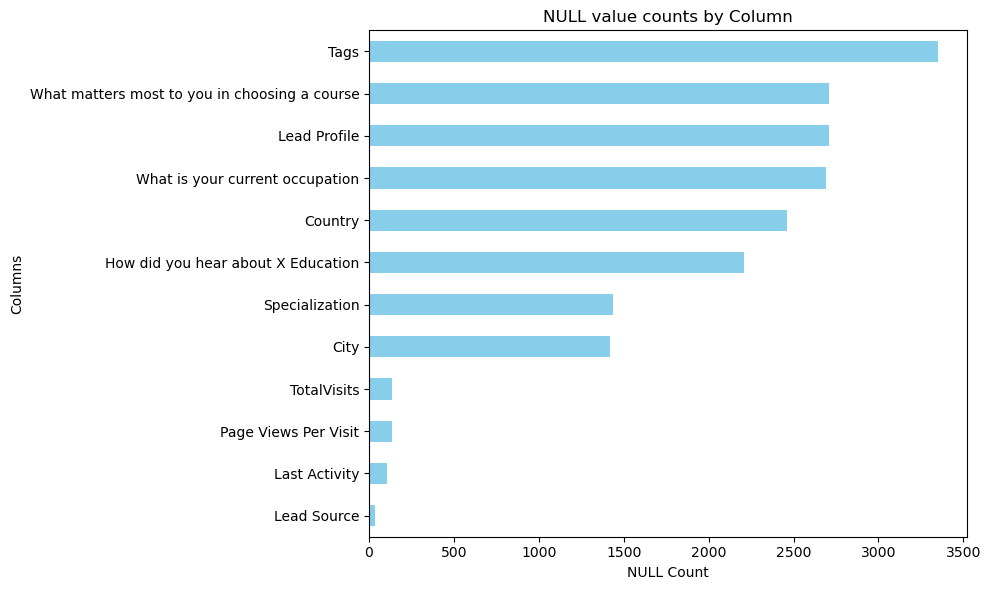

In [21]:
# Retrieving the NULL count again after removing the columns with more NULLs and Single values

null_values_summary = leads_data.isnull().sum()[leads_data.isnull().sum() > 0].sort_values(ascending = False)

# Plotting the NULL column count

null_values_summary.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.xlabel('NULL Count')
plt.ylabel('Columns')
plt.title('NULL value counts by Column')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest count at the top
plt.tight_layout()

# Display the chart
plt.show()

In [22]:
# Removing the rows for which we have less than 2% of NULL values

# Dropping rows null values in TotalVisits
print(f'Number of NULL values in "TotalVisits" Column before removing it is {leads_data.TotalVisits.isnull().sum()}')
leads_data = leads_data[~(leads_data.TotalVisits.isnull())]
print(f'Number of NULL values in "TotalVisits" Column after removing it is {leads_data.TotalVisits.isnull().sum()}')

# Dropping rows null values in Page Views Per Visit
print(f'Number of NULL values in "Page Views Per Visit" Column before removing it is {leads_data.TotalVisits.isnull().sum()}')
leads_data = leads_data[~(leads_data['Page Views Per Visit'].isnull())]
print(f'Number of NULL values in "Page Views Per Visit" Column after removing it is {leads_data.TotalVisits.isnull().sum()}')

# Dropping rows null values in Last Activity
print(f'Number of NULL values in "Last Activity" Column before removing it is {leads_data.TotalVisits.isnull().sum()}')
leads_data = leads_data[~(leads_data['Last Activity'].isnull())]
print(f'Number of NULL values in "Last Activity" Column after removing it is {leads_data.TotalVisits.isnull().sum()}')

# Dropping rows null values in Lead Source
print(f'Number of NULL values in "Lead Source" Column before removing it is {leads_data.TotalVisits.isnull().sum()}')
leads_data = leads_data[~(leads_data['Lead Source'].isnull())]
print(f'Number of NULL values in "Lead Source" Column after removing it is {leads_data.TotalVisits.isnull().sum()}')

Number of NULL values in "TotalVisits" Column before removing it is 137
Number of NULL values in "TotalVisits" Column after removing it is 0
Number of NULL values in "Page Views Per Visit" Column before removing it is 0
Number of NULL values in "Page Views Per Visit" Column after removing it is 0
Number of NULL values in "Last Activity" Column before removing it is 0
Number of NULL values in "Last Activity" Column after removing it is 0
Number of NULL values in "Lead Source" Column before removing it is 0
Number of NULL values in "Lead Source" Column after removing it is 0


In [23]:
# Validating the shape of the Data after removing the rows for which we have less than 2% of NULL values

leads_data.shape

(9074, 19)

In [24]:
# Imputing all the other NULL values as 'Unknown'

leads_data['Tags'].fillna('unknown', inplace=True)
leads_data['Lead Profile'].fillna('unknown', inplace=True)
leads_data['Country'].fillna('unknown', inplace=True)
leads_data['City'].fillna('unknown', inplace=True)
leads_data['Specialization'].fillna('unknown', inplace=True)
leads_data['How did you hear about X Education'].fillna('unknown', inplace=True)
leads_data['What matters most to you in choosing a course'].fillna('unknown', inplace=True)
leads_data['What is your current occupation'].fillna('unknown', inplace=True)

In [25]:
# Validating the shape of the Data after imputing the NULL values

leads_data.shape

(9074, 19)

In [26]:
# Replacing all the columns which has values 'Select' with 'unknown' as 'Select' means thye have not selected any options which is as good as NULL value

leads_data['Specialization'] = leads_data['Specialization'].replace('Select', 'unknown')
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace('Select', 'unknown')
leads_data['Lead Profile'] = leads_data['Lead Profile'].replace('Select', 'unknown')
leads_data['City'] = leads_data['City'].replace('Select', 'unknown')

#### Handling Outliers

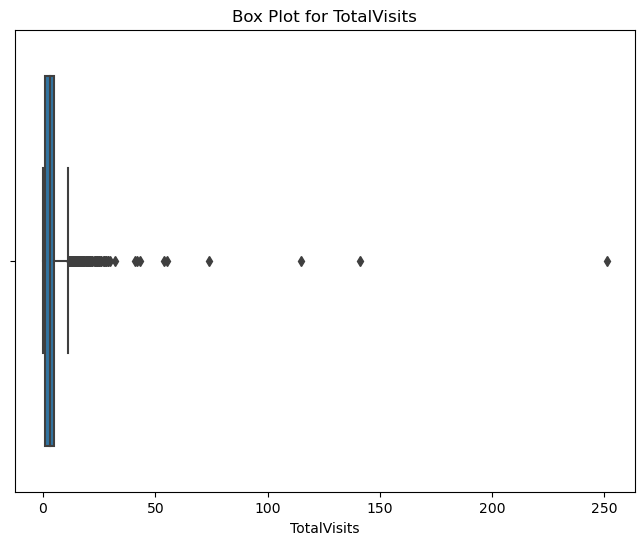

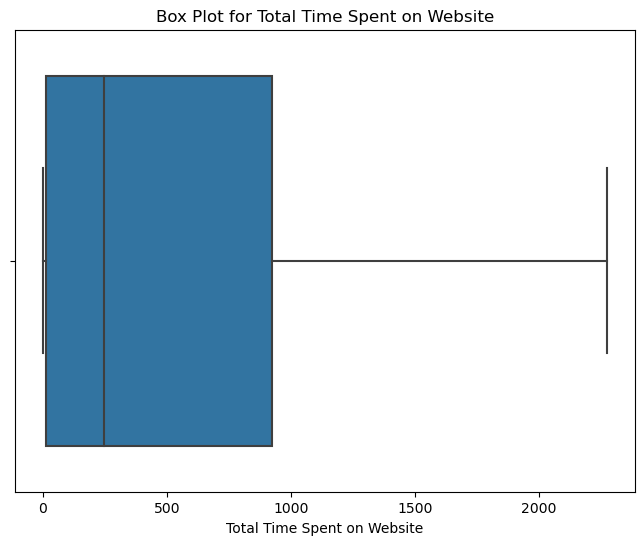

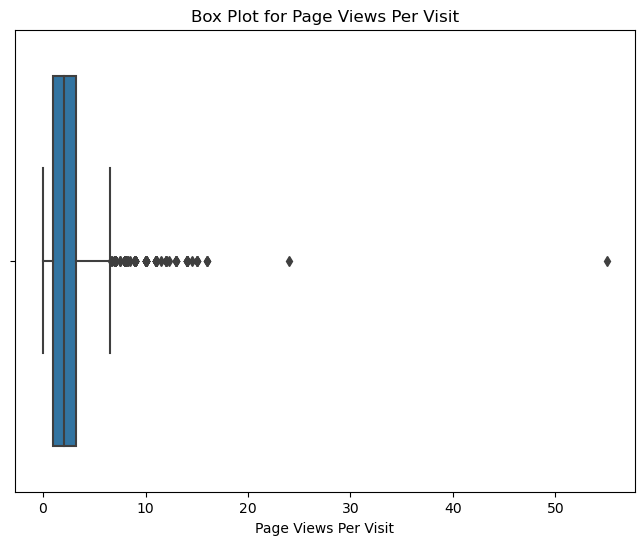

In [27]:
# Checking the outliers for the numerical data

# Selecting the numerical columns
numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Creating box plots for each numerical feature

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=leads_data, x=column)
    plt.title(f'Box Plot for {column}')
    plt.show()

In [28]:
# Checking TotalVisits column

leads_data[leads_data["TotalVisits"] > 50]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,Yes,0,55.0,297,55.00,Page Visited on Website,India,IT Projects Management,unknown,Unemployed,Better Career Prospects,No,unknown,unknown,Other Cities,Yes,Modified
2322,Landing Page Submission,Direct Traffic,Yes,0,141.0,755,6.71,Page Visited on Website,India,Human Resource Management,unknown,unknown,unknown,No,unknown,unknown,Mumbai,Yes,Page Visited on Website
5283,Landing Page Submission,Direct Traffic,Yes,0,74.0,1209,12.33,Page Visited on Website,India,unknown,Advertisements,Unemployed,Better Career Prospects,No,Not doing further education,unknown,Thane & Outskirts,No,Page Visited on Website
5538,Landing Page Submission,Referral Sites,No,0,54.0,1280,4.50,SMS Sent,India,unknown,Advertisements,unknown,unknown,No,unknown,unknown,Mumbai,No,SMS Sent
5608,Landing Page Submission,Referral Sites,Yes,0,115.0,187,8.21,Page Visited on Website,India,Rural and Agribusiness,unknown,Unemployed,unknown,No,unknown,unknown,Mumbai,No,Page Visited on Website
6102,Landing Page Submission,Direct Traffic,No,1,251.0,49,1.48,Page Visited on Website,India,Supply Chain Management,unknown,Unemployed,Better Career Prospects,No,Interested in other courses,unknown,Mumbai,Yes,Page Visited on Website


In [29]:
# Checking TotalVisits column

leads_data[leads_data["Page Views Per Visit"] > 16]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,Yes,0,55.0,297,55.0,Page Visited on Website,India,IT Projects Management,unknown,Unemployed,Better Career Prospects,No,unknown,unknown,Other Cities,Yes,Modified
6805,API,Organic Search,No,1,24.0,1527,24.0,Page Visited on Website,unknown,unknown,unknown,unknown,unknown,No,unknown,unknown,unknown,No,Modified


In [30]:
# Deleting the records above

leads_data = leads_data[leads_data["TotalVisits"] < 50]
leads_data = leads_data[leads_data["Page Views Per Visit"] < 16]

In [31]:
# Validating the shape of the Data after imputing the NULL values

leads_data.shape

(9064, 19)

In [32]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9064 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9064 non-null   object 
 1   Lead Source                                    9064 non-null   object 
 2   Do Not Email                                   9064 non-null   object 
 3   Converted                                      9064 non-null   int64  
 4   TotalVisits                                    9064 non-null   float64
 5   Total Time Spent on Website                    9064 non-null   int64  
 6   Page Views Per Visit                           9064 non-null   float64
 7   Last Activity                                  9064 non-null   object 
 8   Country                                        9064 non-null   object 
 9   Specialization                                 9064 

#### <a id='step1.5'></a> Data Analysis

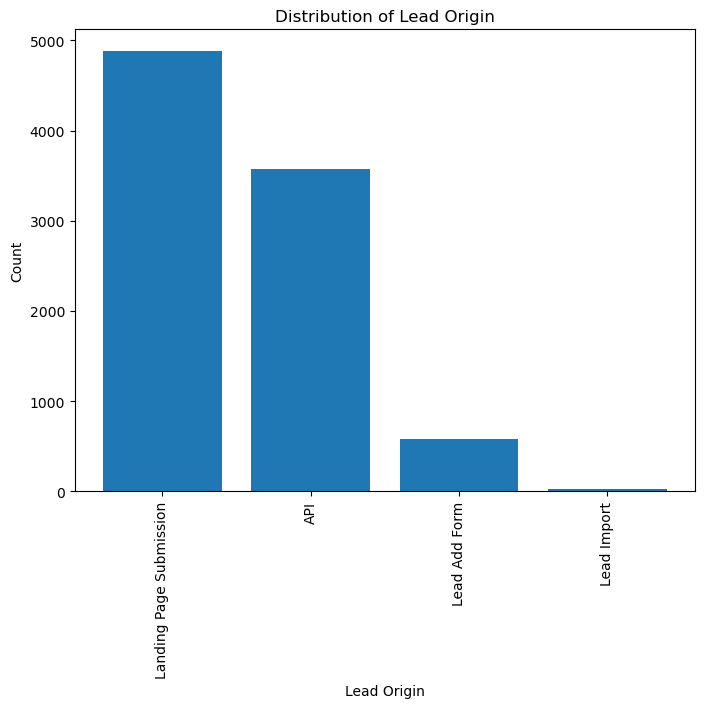

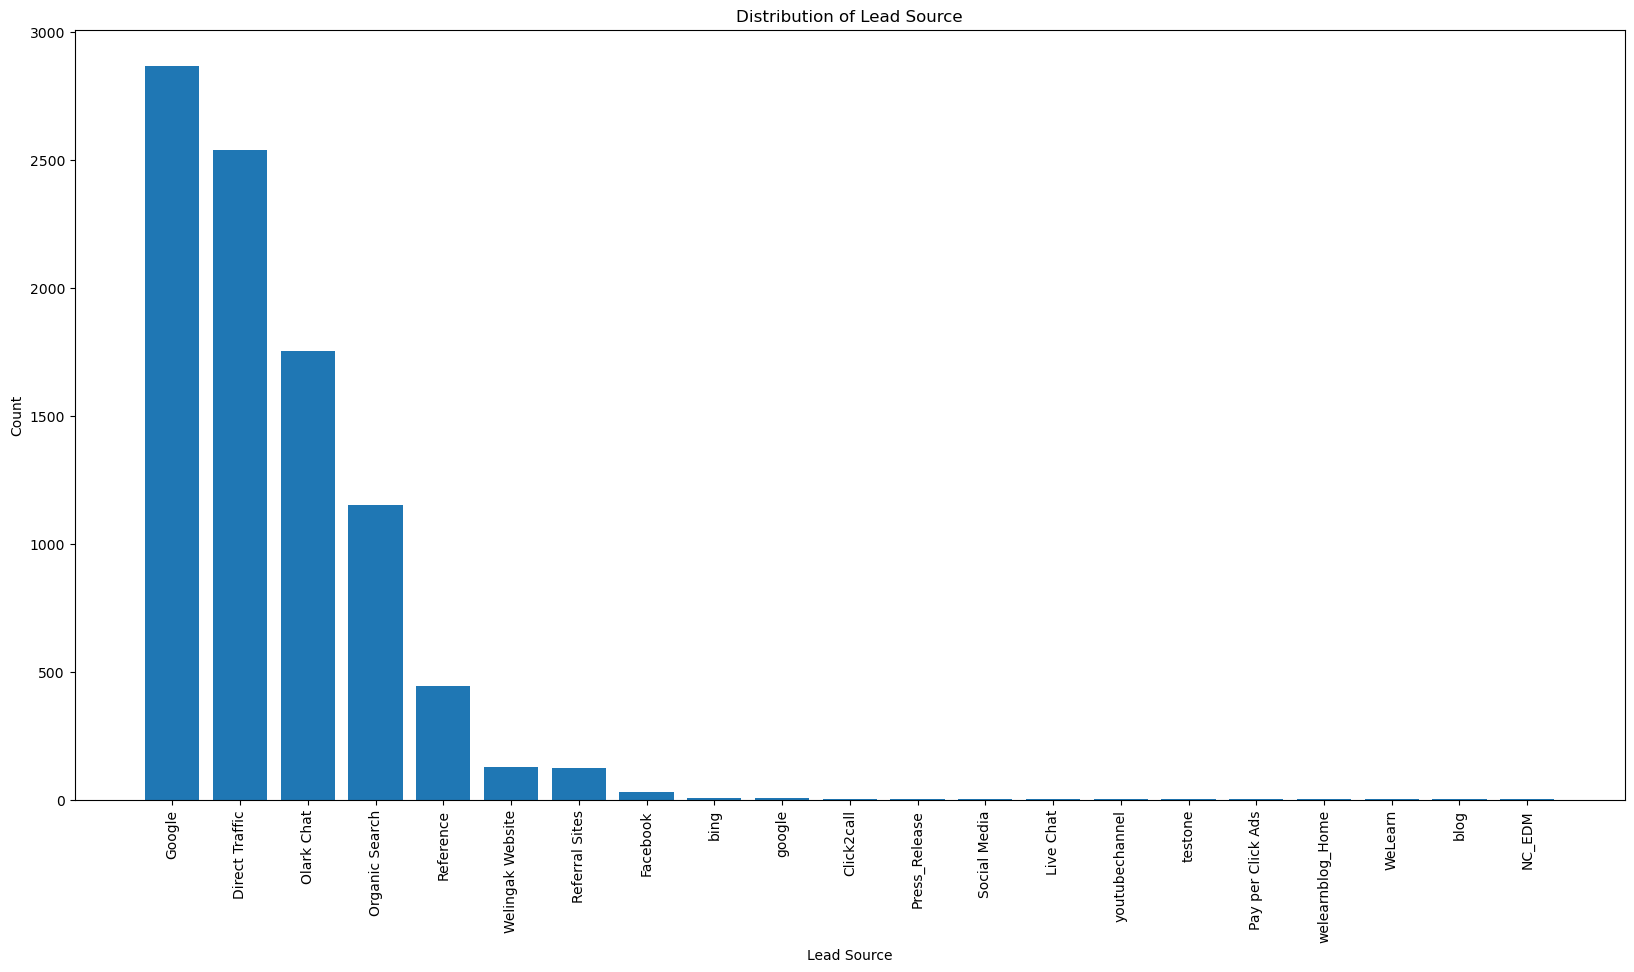

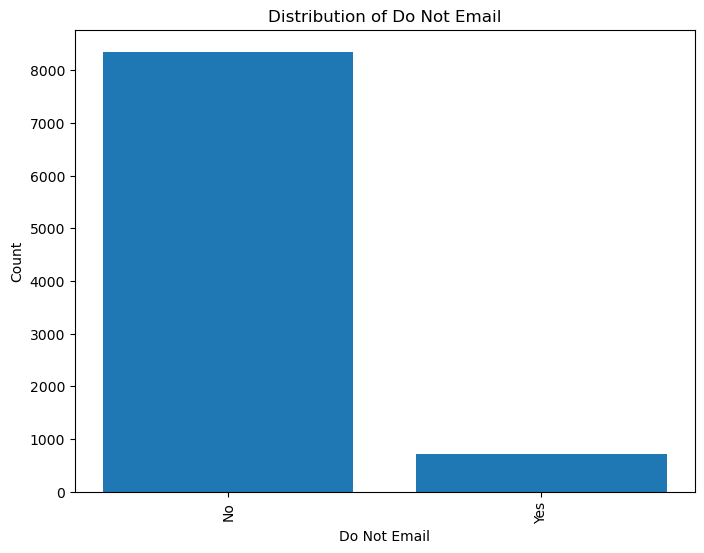

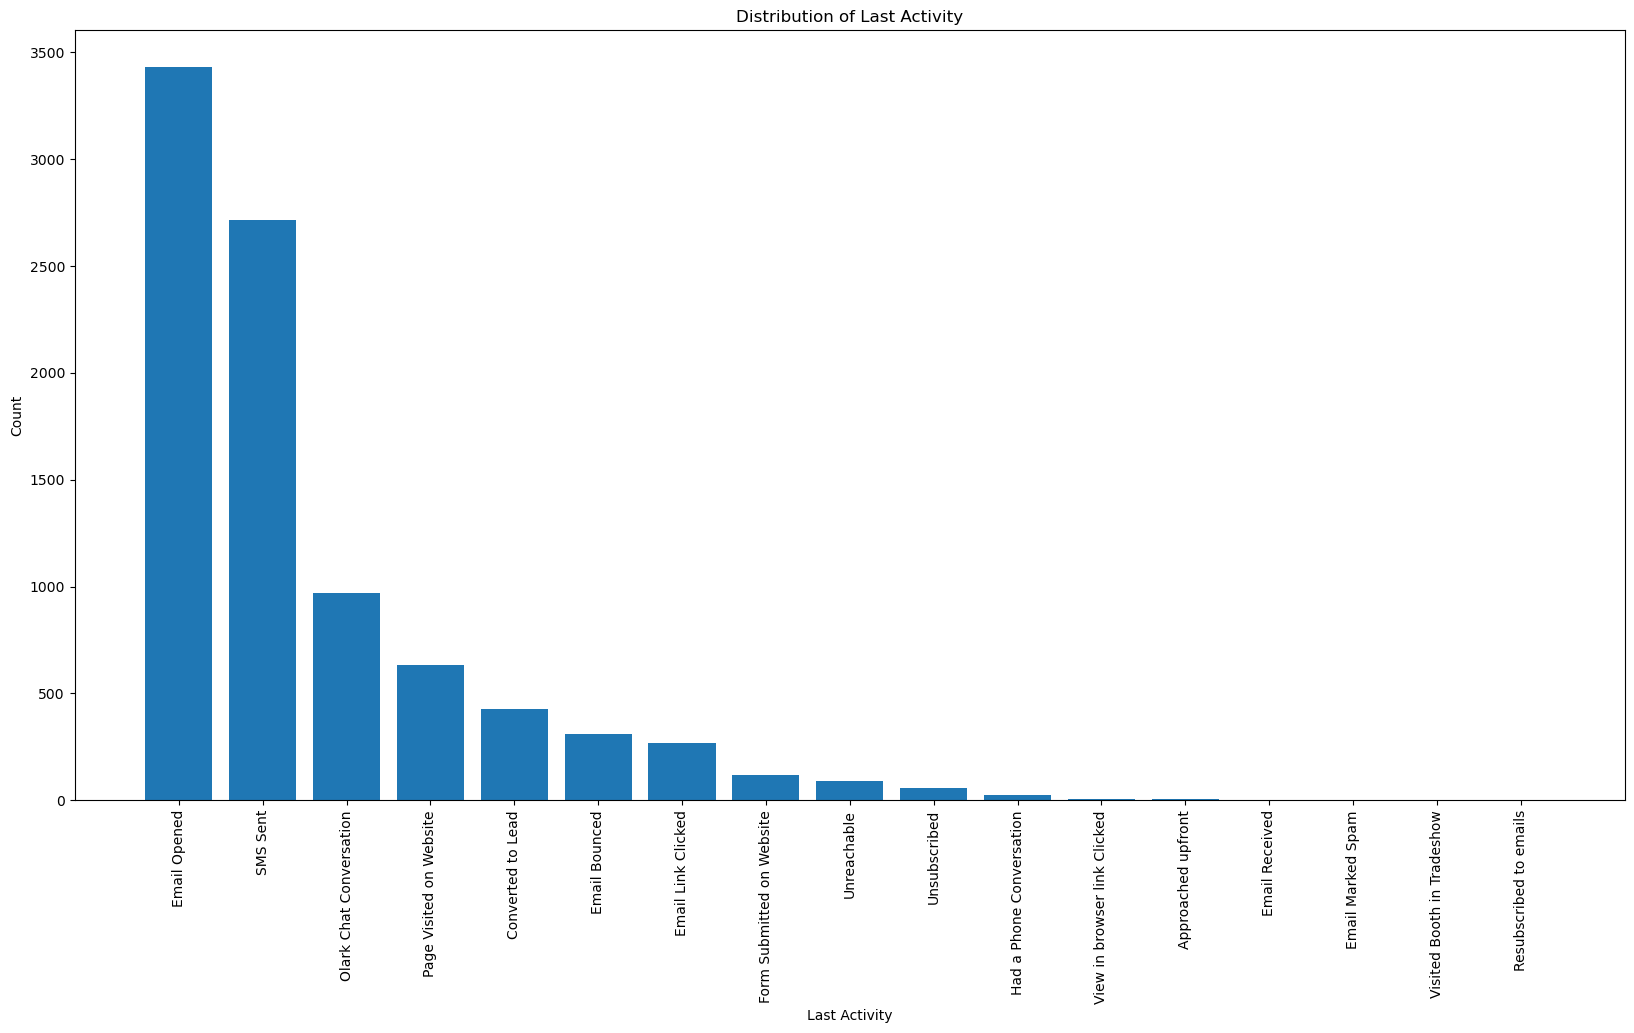

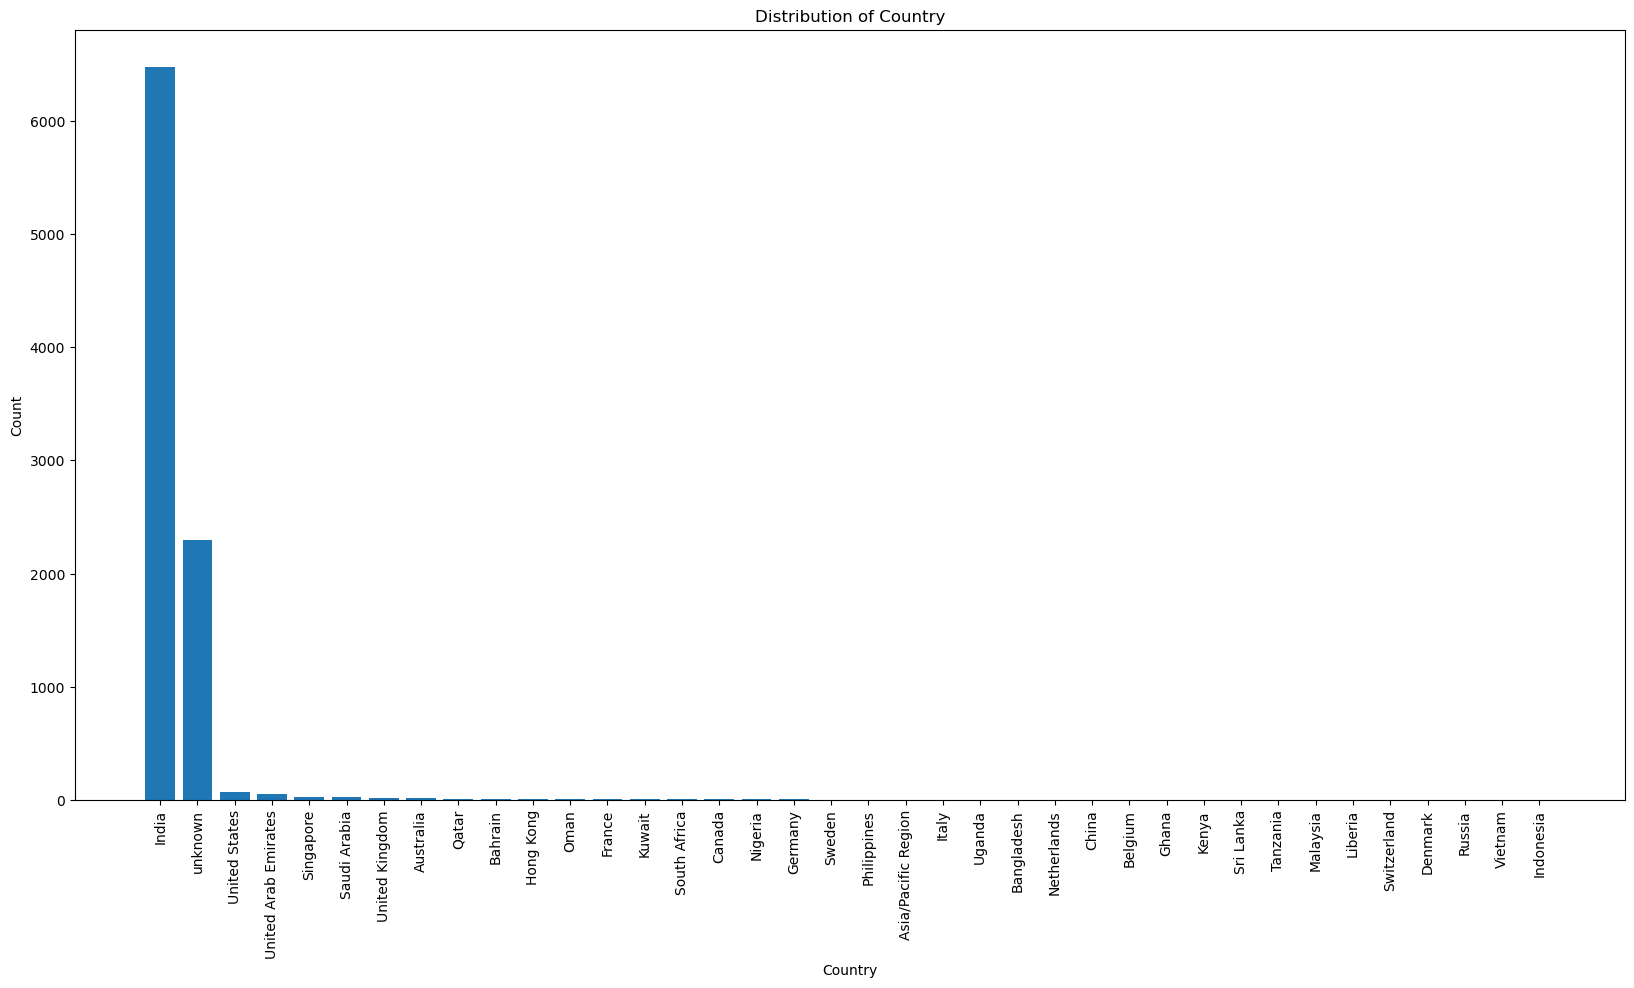

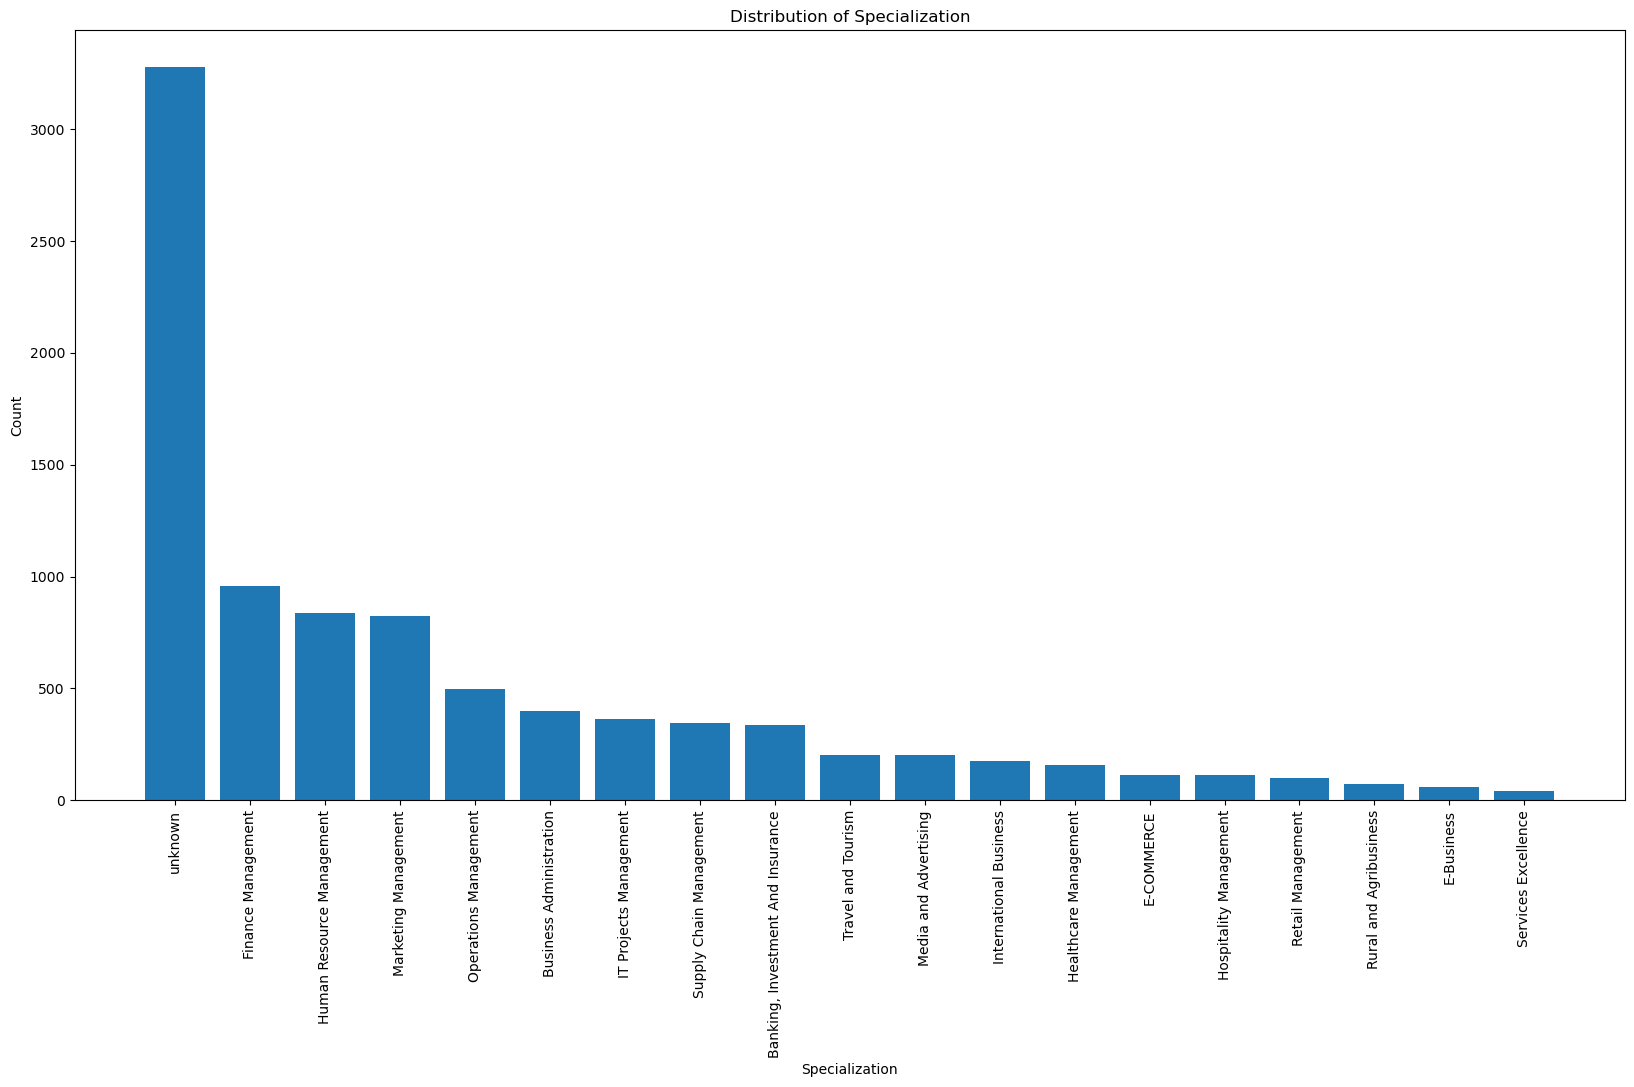

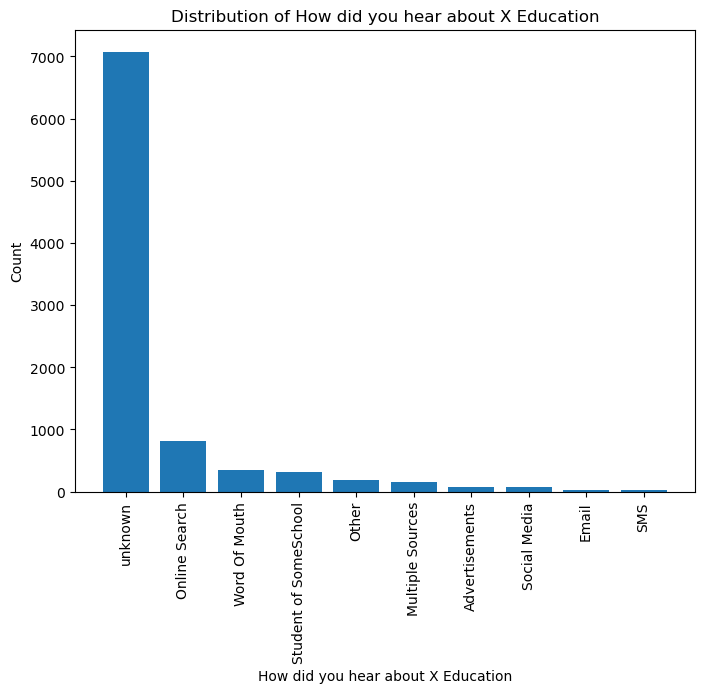

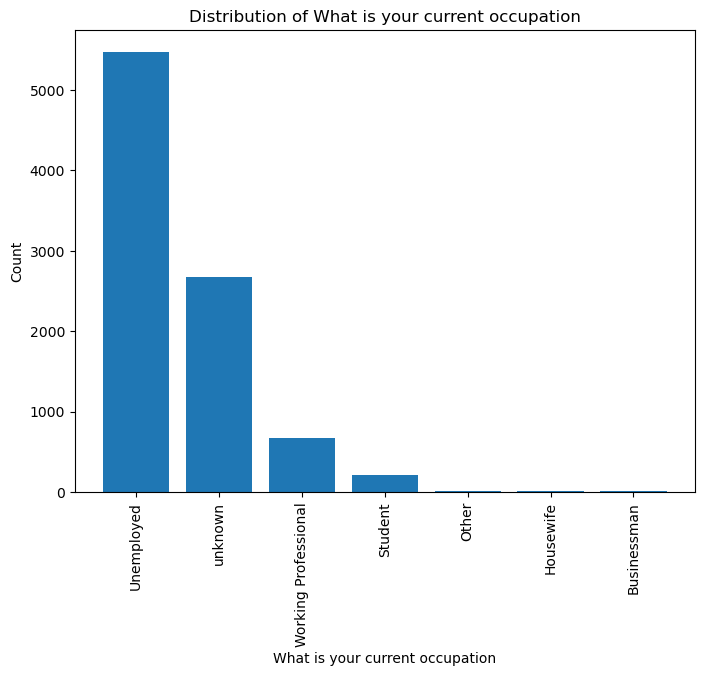

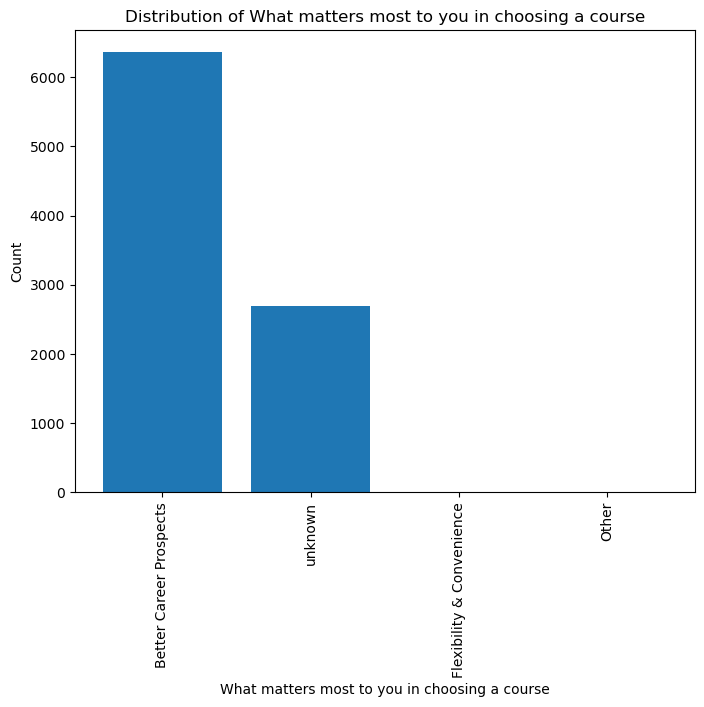

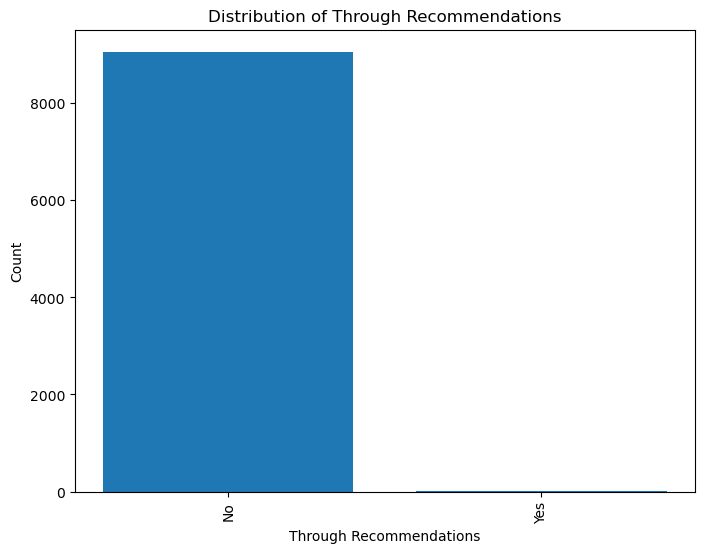

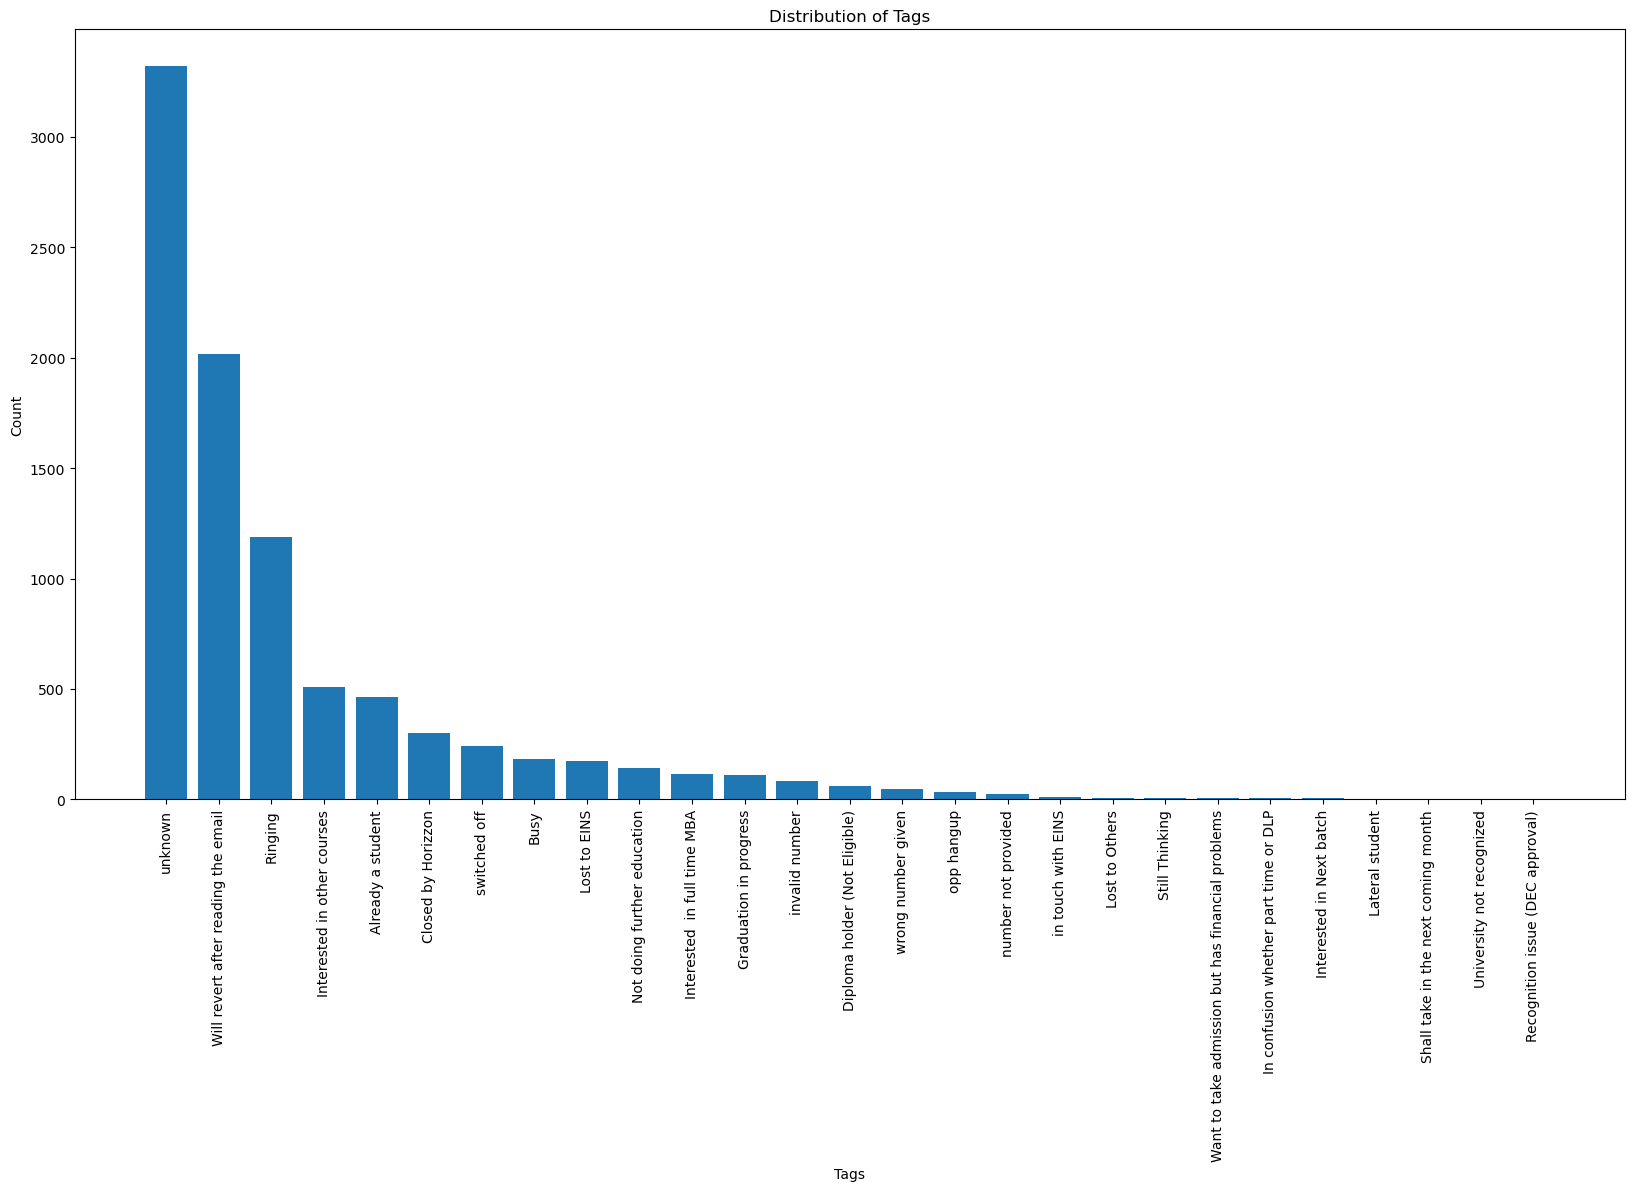

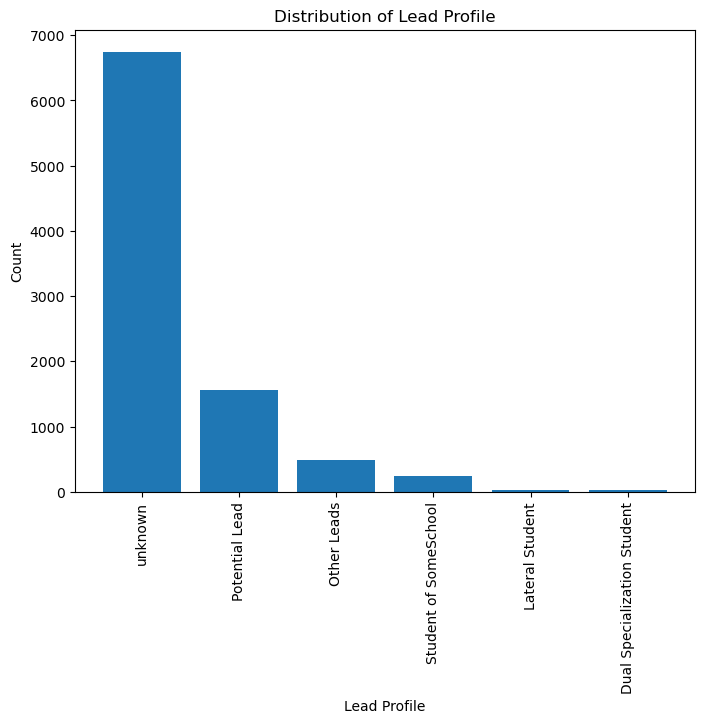

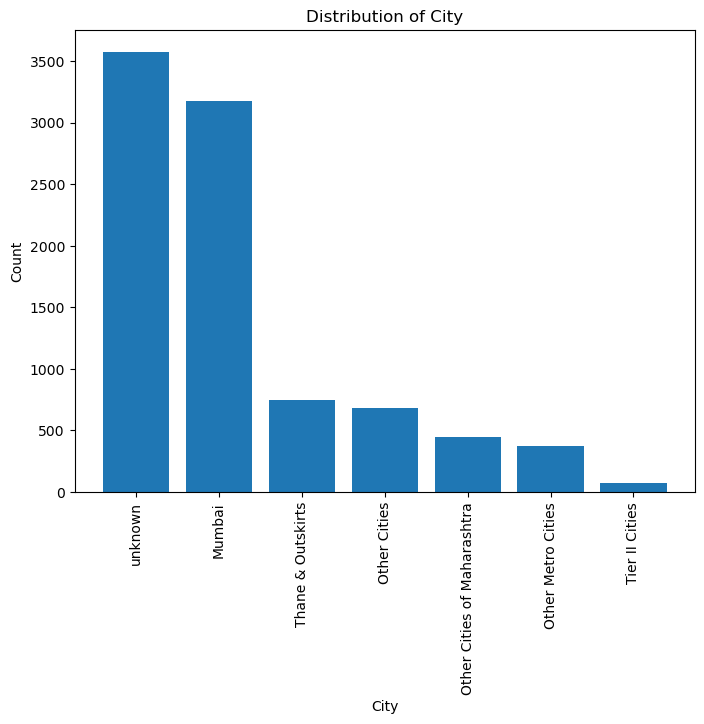

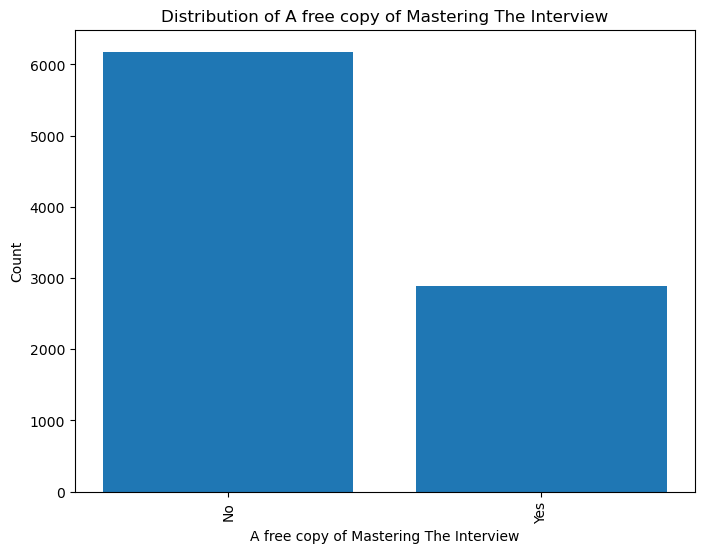

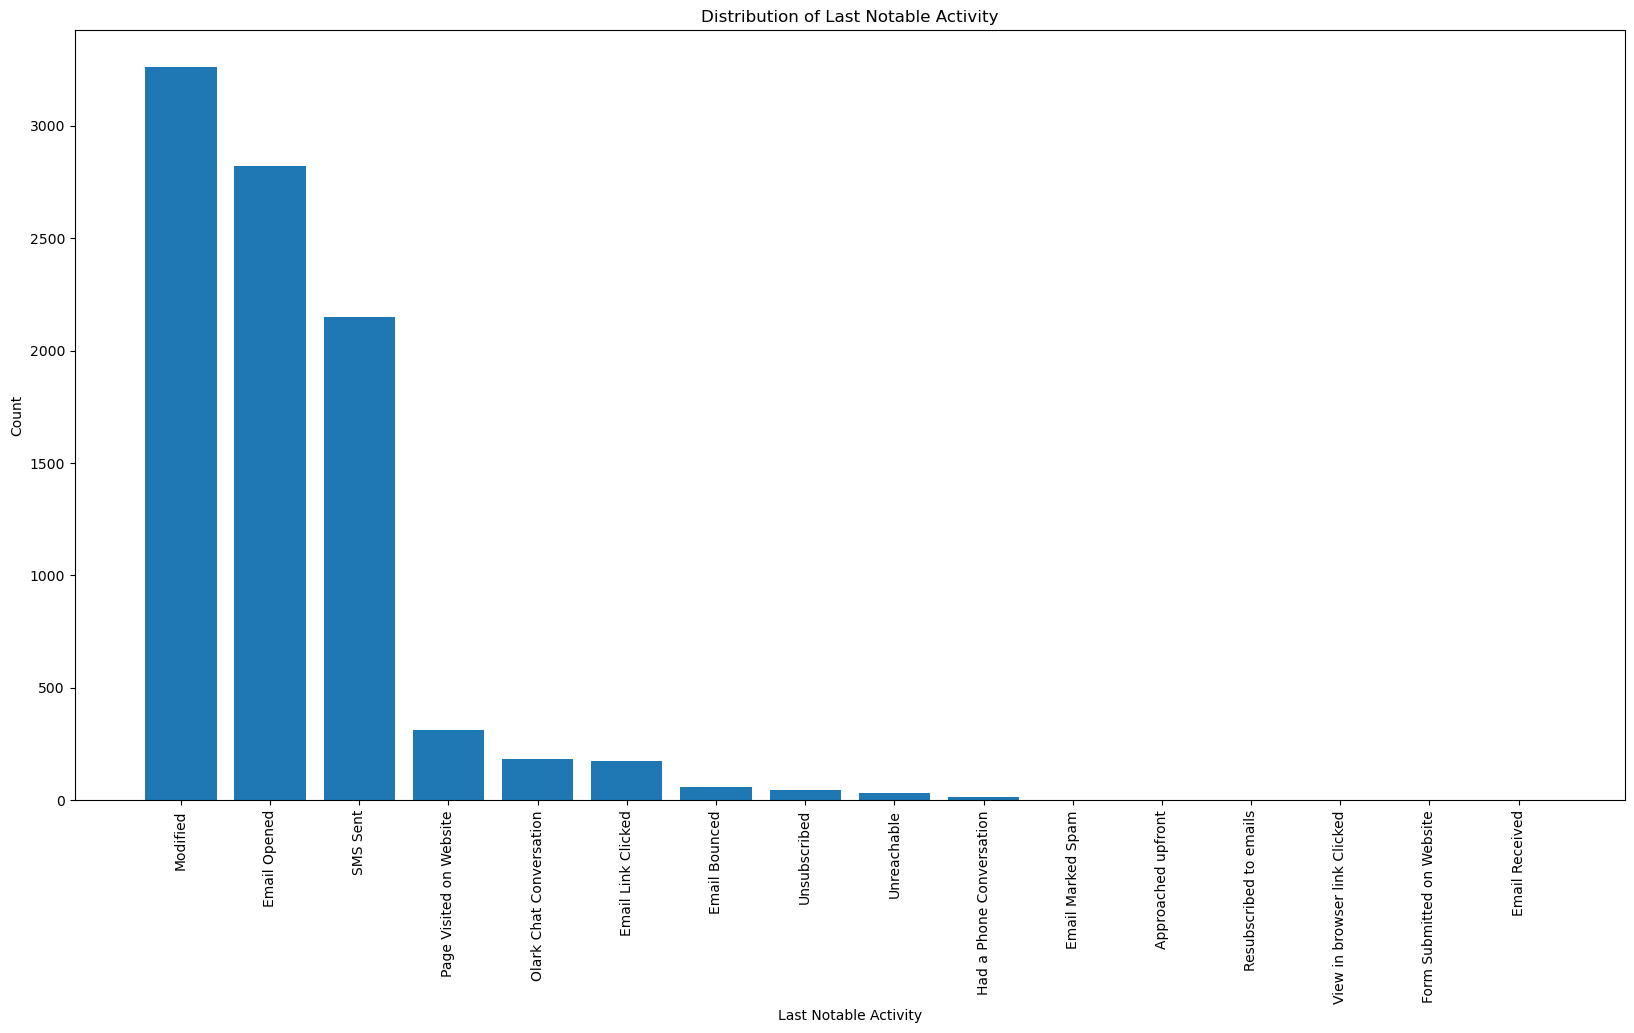

In [33]:
# plotting a bar graph w.r.t target variable for all the categorical features
categorical_columns = leads_data.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    
    # Create a frequency table
    freq_table = leads_data[column].value_counts().reset_index()
    freq_table.columns = [column, 'Count']
    
    # Calculate percentages
    freq_table['Percentage'] = (freq_table['Count'] / freq_table['Count'].sum()) * 100

    # Create a bar plot
    if len(leads_data[column].unique()) > 15:
        plt.figure(figsize=(20, 10))
    else:
        plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    ax.bar(freq_table[column], freq_table['Count'])
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    plt.xticks(rotation=90)
    plt.show()

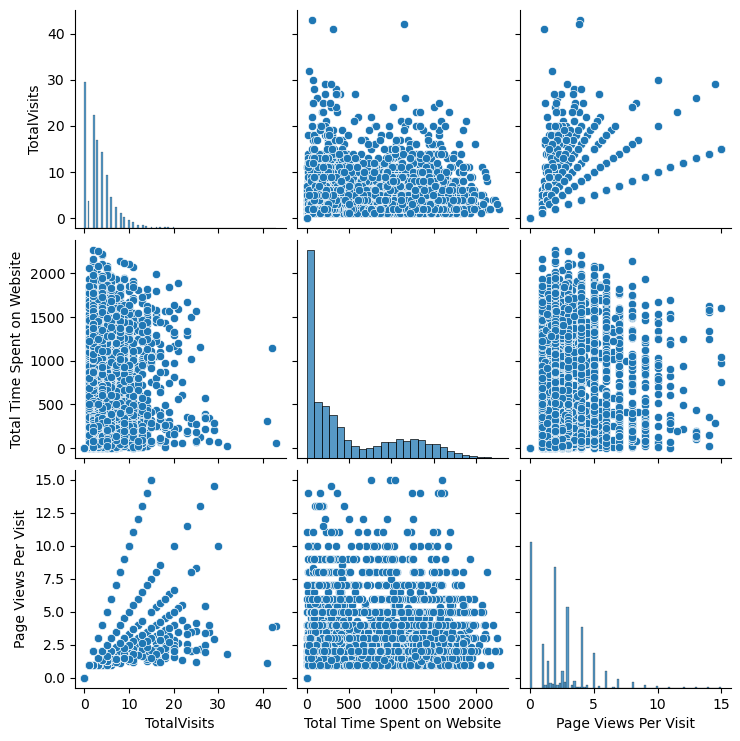

In [34]:
# plotting a pair plot for all the numerical features

sns.pairplot(data = leads_data[numerical_columns])
plt.show()

<Axes: >

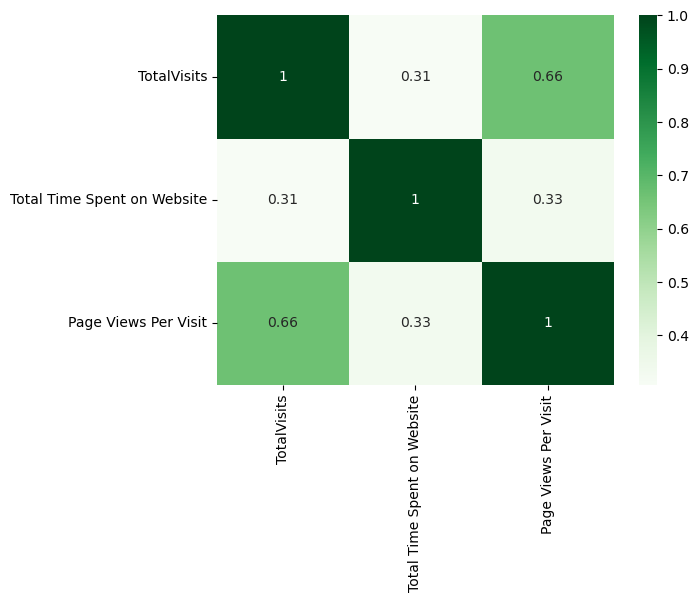

In [35]:
# Validating the correlation of numerical feaures with heatmap

sns.heatmap(leads_data[numerical_columns].corr(), cmap='Greens', annot=True)

**Univariate Analysis w.r.t Target Variable**

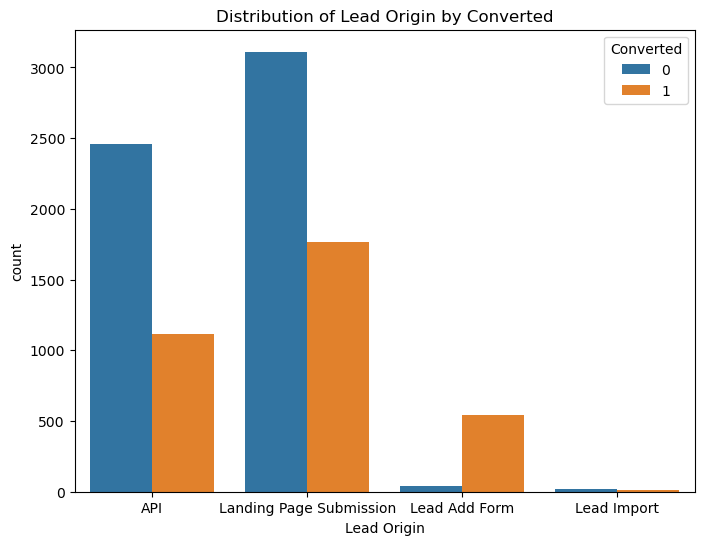

----------------------------------------
Frequency Count for Lead Origin:
╒═════════════════════════╤══════╤══════╕
│ Lead Origin             │    0 │    1 │
╞═════════════════════════╪══════╪══════╡
│ API                     │ 2462 │ 1114 │
├─────────────────────────┼──────┼──────┤
│ Landing Page Submission │ 3111 │ 1766 │
├─────────────────────────┼──────┼──────┤
│ Lead Add Form           │   37 │  544 │
├─────────────────────────┼──────┼──────┤
│ Lead Import             │   21 │    9 │
╘═════════════════════════╧══════╧══════╛

Percentage Distribution for Lead Origin:
╒═════════════════════════╤══════════╤═════════╕
│ Lead Origin             │        0 │       1 │
╞═════════════════════════╪══════════╪═════════╡
│ API                     │ 68.8479  │ 31.1521 │
├─────────────────────────┼──────────┼─────────┤
│ Landing Page Submission │ 63.7892  │ 36.2108 │
├─────────────────────────┼──────────┼─────────┤
│ Lead Add Form           │  6.36833 │ 93.6317 │
├─────────────────────────┼───

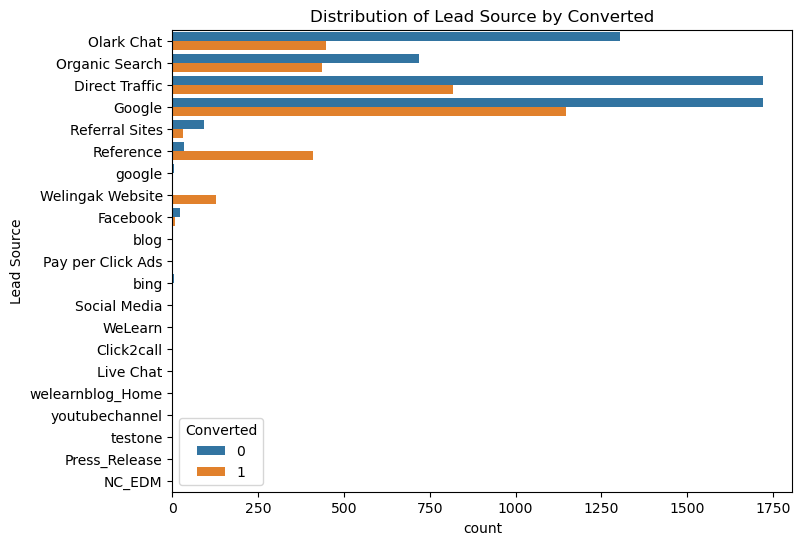

----------------------------------------
Frequency Count for Lead Source:
╒═══════════════════╤══════╤══════╕
│ Lead Source       │    0 │    1 │
╞═══════════════════╪══════╪══════╡
│ Click2call        │    1 │    3 │
├───────────────────┼──────┼──────┤
│ Direct Traffic    │ 1721 │  817 │
├───────────────────┼──────┼──────┤
│ Facebook          │   22 │    9 │
├───────────────────┼──────┼──────┤
│ Google            │ 1720 │ 1147 │
├───────────────────┼──────┼──────┤
│ Live Chat         │    0 │    2 │
├───────────────────┼──────┼──────┤
│ NC_EDM            │    0 │    1 │
├───────────────────┼──────┼──────┤
│ Olark Chat        │ 1305 │  448 │
├───────────────────┼──────┼──────┤
│ Organic Search    │  718 │  435 │
├───────────────────┼──────┼──────┤
│ Pay per Click Ads │    1 │    0 │
├───────────────────┼──────┼──────┤
│ Press_Release     │    2 │    0 │
├───────────────────┼──────┼──────┤
│ Reference         │   33 │  410 │
├───────────────────┼──────┼──────┤
│ Referral Sites    │   91

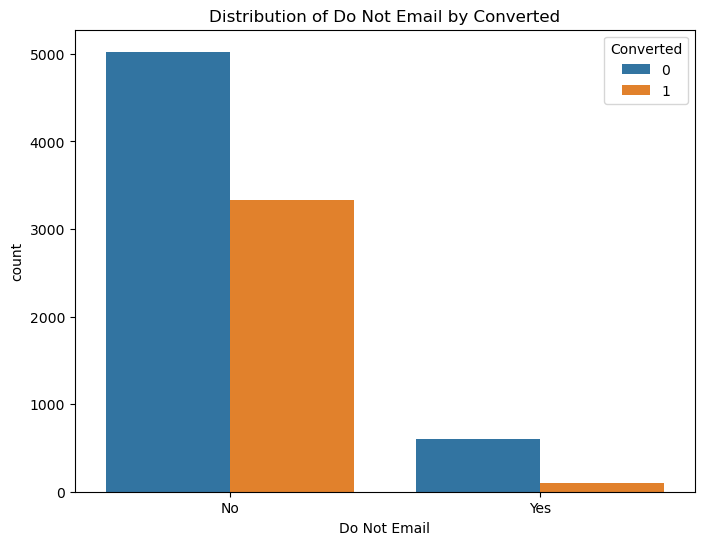

----------------------------------------
Frequency Count for Do Not Email:
╒════════════════╤══════╤══════╕
│ Do Not Email   │    0 │    1 │
╞════════════════╪══════╪══════╡
│ No             │ 5025 │ 3329 │
├────────────────┼──────┼──────┤
│ Yes            │  606 │  104 │
╘════════════════╧══════╧══════╛

Percentage Distribution for Do Not Email:
╒════════════════╤═════════╤═════════╕
│ Do Not Email   │       0 │       1 │
╞════════════════╪═════════╪═════════╡
│ No             │ 60.1508 │ 39.8492 │
├────────────────┼─────────┼─────────┤
│ Yes            │ 85.3521 │ 14.6479 │
╘════════════════╧═════════╧═════════╛
----------------------------------------


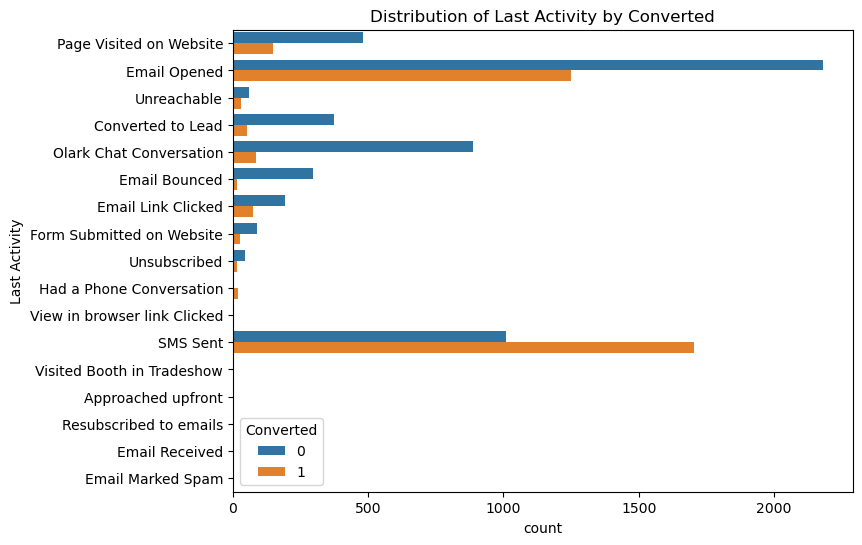

----------------------------------------
Frequency Count for Last Activity:
╒══════════════════════════════╤══════╤══════╕
│ Last Activity                │    0 │    1 │
╞══════════════════════════════╪══════╪══════╡
│ Approached upfront           │    0 │    5 │
├──────────────────────────────┼──────┼──────┤
│ Converted to Lead            │  374 │   54 │
├──────────────────────────────┼──────┼──────┤
│ Email Bounced                │  296 │   16 │
├──────────────────────────────┼──────┼──────┤
│ Email Link Clicked           │  194 │   73 │
├──────────────────────────────┼──────┼──────┤
│ Email Marked Spam            │    0 │    2 │
├──────────────────────────────┼──────┼──────┤
│ Email Opened                 │ 2182 │ 1250 │
├──────────────────────────────┼──────┼──────┤
│ Email Received               │    0 │    2 │
├──────────────────────────────┼──────┼──────┤
│ Form Submitted on Website    │   88 │   28 │
├──────────────────────────────┼──────┼──────┤
│ Had a Phone Conversation     

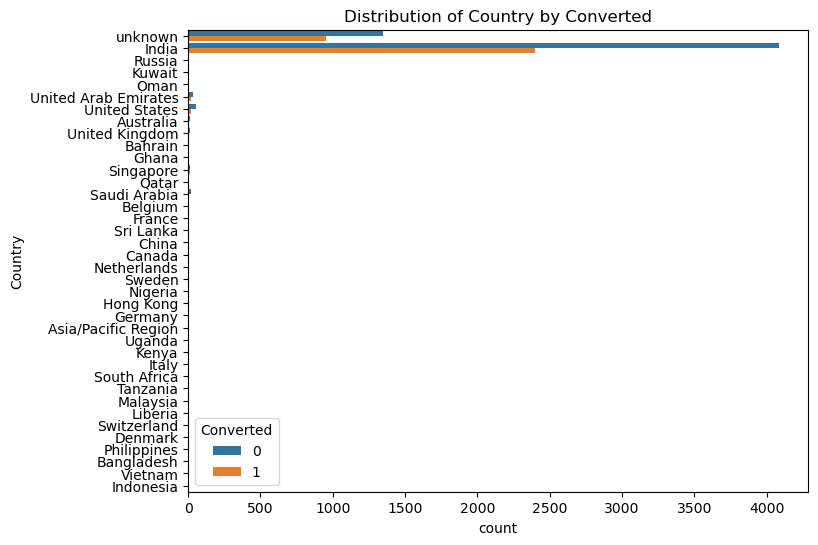

----------------------------------------
Frequency Count for Country:
╒══════════════════════╤══════╤══════╕
│ Country              │    0 │    1 │
╞══════════════════════╪══════╪══════╡
│ Asia/Pacific Region  │    1 │    1 │
├──────────────────────┼──────┼──────┤
│ Australia            │   10 │    3 │
├──────────────────────┼──────┼──────┤
│ Bahrain              │    3 │    4 │
├──────────────────────┼──────┼──────┤
│ Bangladesh           │    1 │    1 │
├──────────────────────┼──────┼──────┤
│ Belgium              │    2 │    0 │
├──────────────────────┼──────┼──────┤
│ Canada               │    4 │    0 │
├──────────────────────┼──────┼──────┤
│ China                │    2 │    0 │
├──────────────────────┼──────┼──────┤
│ Denmark              │    0 │    1 │
├──────────────────────┼──────┼──────┤
│ France               │    3 │    3 │
├──────────────────────┼──────┼──────┤
│ Germany              │    3 │    1 │
├──────────────────────┼──────┼──────┤
│ Ghana                │    2 │  

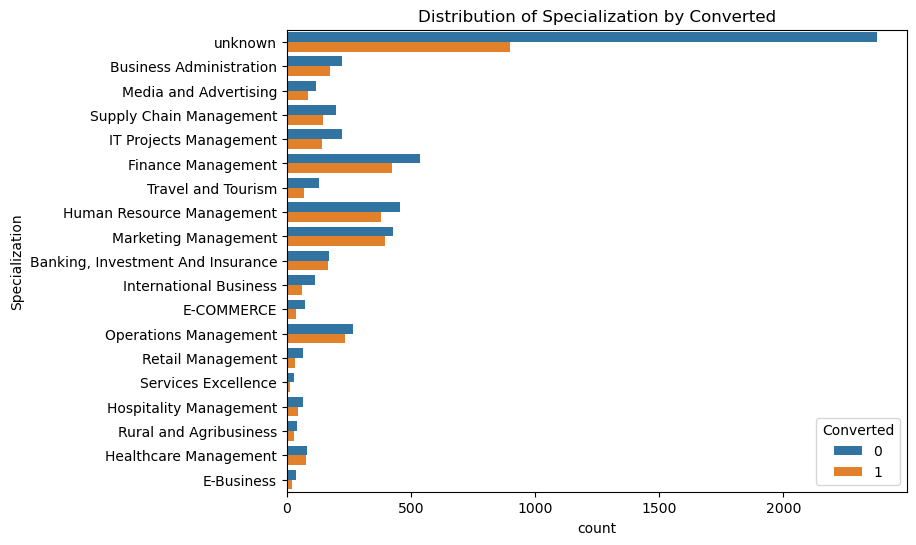

----------------------------------------
Frequency Count for Specialization:
╒═══════════════════════════════════╤══════╤═════╕
│ Specialization                    │    0 │   1 │
╞═══════════════════════════════════╪══════╪═════╡
│ Banking, Investment And Insurance │  171 │ 164 │
├───────────────────────────────────┼──────┼─────┤
│ Business Administration           │  224 │ 175 │
├───────────────────────────────────┼──────┼─────┤
│ E-Business                        │   36 │  21 │
├───────────────────────────────────┼──────┼─────┤
│ E-COMMERCE                        │   72 │  39 │
├───────────────────────────────────┼──────┼─────┤
│ Finance Management                │  536 │ 422 │
├───────────────────────────────────┼──────┼─────┤
│ Healthcare Management             │   80 │  76 │
├───────────────────────────────────┼──────┼─────┤
│ Hospitality Management            │   66 │  45 │
├───────────────────────────────────┼──────┼─────┤
│ Human Resource Management         │  456 │ 380 │
├────

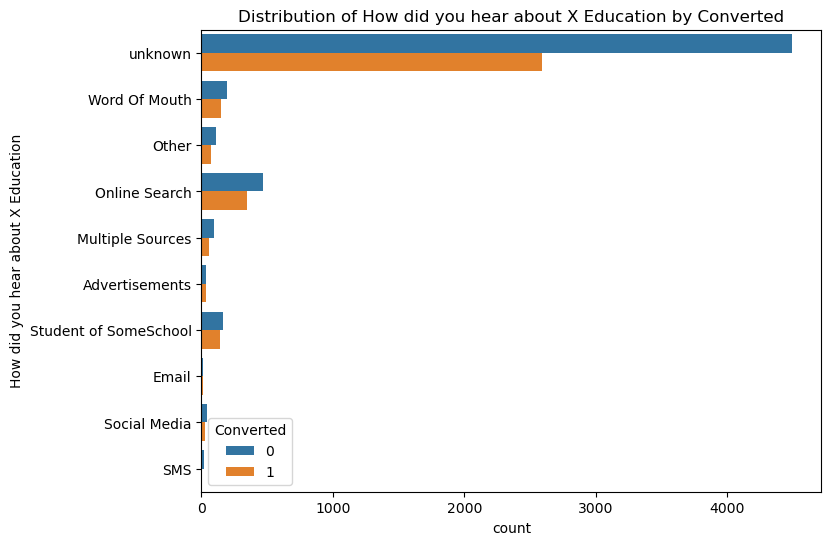

----------------------------------------
Frequency Count for How did you hear about X Education:
╒══════════════════════════════════════╤══════╤══════╕
│ How did you hear about X Education   │    0 │    1 │
╞══════════════════════════════════════╪══════╪══════╡
│ Advertisements                       │   36 │   32 │
├──────────────────────────────────────┼──────┼──────┤
│ Email                                │   13 │   13 │
├──────────────────────────────────────┼──────┼──────┤
│ Multiple Sources                     │   96 │   56 │
├──────────────────────────────────────┼──────┼──────┤
│ Online Search                        │  465 │  343 │
├──────────────────────────────────────┼──────┼──────┤
│ Other                                │  111 │   75 │
├──────────────────────────────────────┼──────┼──────┤
│ SMS                                  │   18 │    5 │
├──────────────────────────────────────┼──────┼──────┤
│ Social Media                         │   39 │   27 │
├──────────────────────

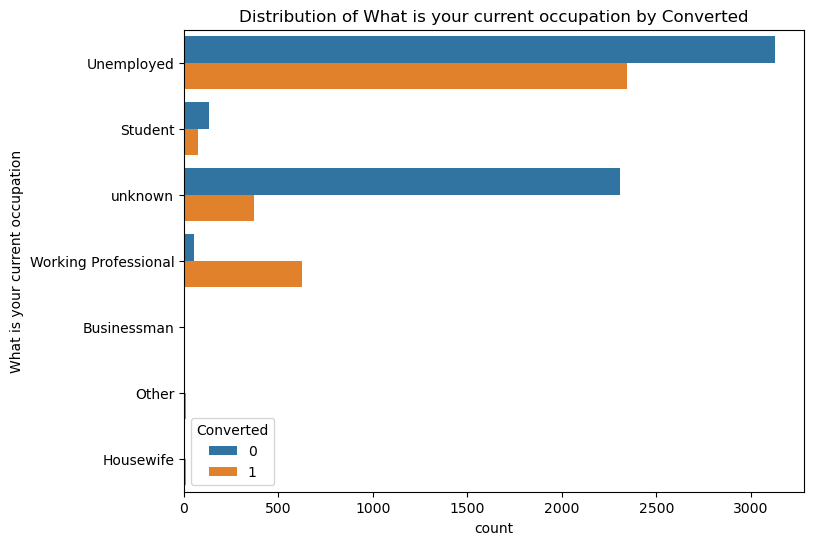

----------------------------------------
Frequency Count for What is your current occupation:
╒═══════════════════════════════════╤══════╤══════╕
│ What is your current occupation   │    0 │    1 │
╞═══════════════════════════════════╪══════╪══════╡
│ Businessman                       │    3 │    5 │
├───────────────────────────────────┼──────┼──────┤
│ Housewife                         │    0 │    9 │
├───────────────────────────────────┼──────┼──────┤
│ Other                             │    6 │    9 │
├───────────────────────────────────┼──────┼──────┤
│ Student                           │  132 │   74 │
├───────────────────────────────────┼──────┼──────┤
│ Unemployed                        │ 3126 │ 2345 │
├───────────────────────────────────┼──────┼──────┤
│ Working Professional              │   55 │  622 │
├───────────────────────────────────┼──────┼──────┤
│ unknown                           │ 2309 │  369 │
╘═══════════════════════════════════╧══════╧══════╛

Percentage Distributi

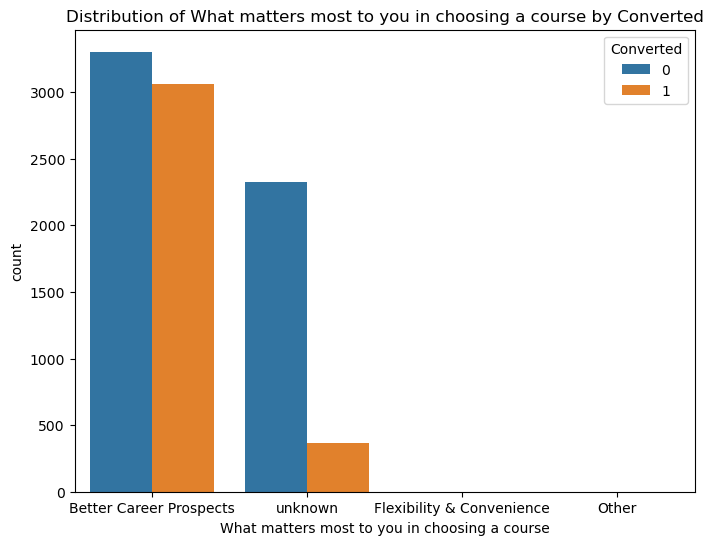

----------------------------------------
Frequency Count for What matters most to you in choosing a course:
╒═════════════════════════════════════════════════╤══════╤══════╕
│ What matters most to you in choosing a course   │    0 │    1 │
╞═════════════════════════════════════════════════╪══════╪══════╡
│ Better Career Prospects                         │ 3303 │ 3063 │
├─────────────────────────────────────────────────┼──────┼──────┤
│ Flexibility & Convenience                       │    0 │    1 │
├─────────────────────────────────────────────────┼──────┼──────┤
│ Other                                           │    1 │    0 │
├─────────────────────────────────────────────────┼──────┼──────┤
│ unknown                                         │ 2327 │  369 │
╘═════════════════════════════════════════════════╧══════╧══════╛

Percentage Distribution for What matters most to you in choosing a course:
╒═════════════════════════════════════════════════╤══════════╤══════════╕
│ What matters m

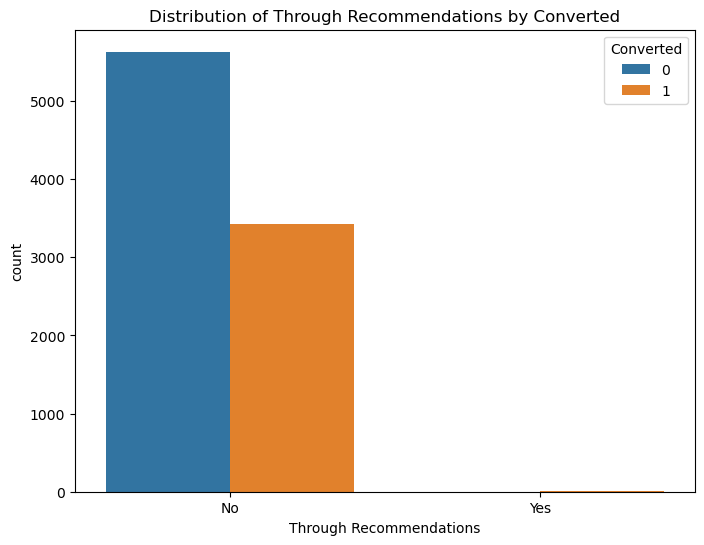

----------------------------------------
Frequency Count for Through Recommendations:
╒═══════════════════════════╤══════╤══════╕
│ Through Recommendations   │    0 │    1 │
╞═══════════════════════════╪══════╪══════╡
│ No                        │ 5629 │ 3428 │
├───────────────────────────┼──────┼──────┤
│ Yes                       │    2 │    5 │
╘═══════════════════════════╧══════╧══════╛

Percentage Distribution for Through Recommendations:
╒═══════════════════════════╤═════════╤═════════╕
│ Through Recommendations   │       0 │       1 │
╞═══════════════════════════╪═════════╪═════════╡
│ No                        │ 62.1508 │ 37.8492 │
├───────────────────────────┼─────────┼─────────┤
│ Yes                       │ 28.5714 │ 71.4286 │
╘═══════════════════════════╧═════════╧═════════╛
----------------------------------------


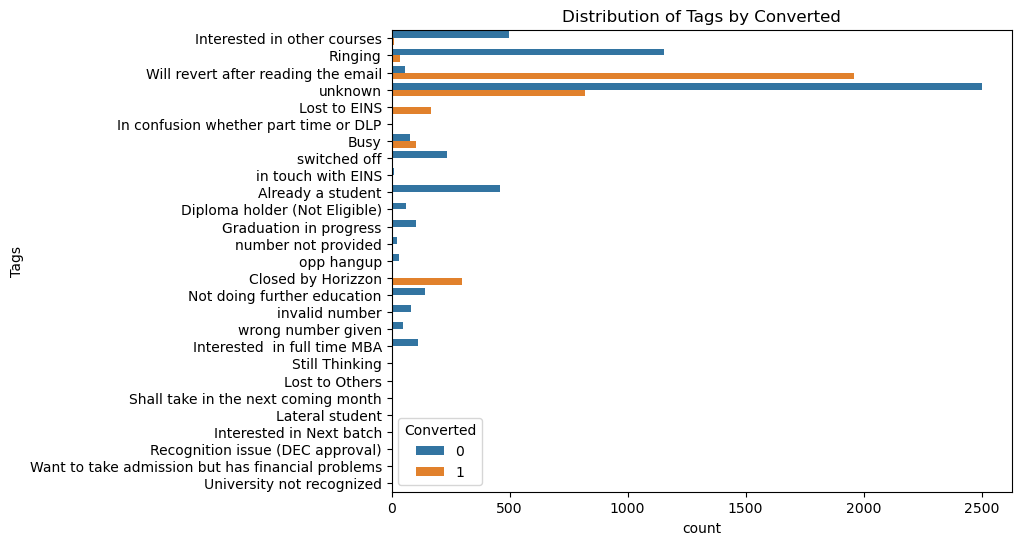

----------------------------------------
Frequency Count for Tags:
╒═══════════════════════════════════════════════════╤══════╤══════╕
│ Tags                                              │    0 │    1 │
╞═══════════════════════════════════════════════════╪══════╪══════╡
│ Already a student                                 │  461 │    3 │
├───────────────────────────────────────────────────┼──────┼──────┤
│ Busy                                              │   80 │  105 │
├───────────────────────────────────────────────────┼──────┼──────┤
│ Closed by Horizzon                                │    2 │  299 │
├───────────────────────────────────────────────────┼──────┼──────┤
│ Diploma holder (Not Eligible)                     │   62 │    1 │
├───────────────────────────────────────────────────┼──────┼──────┤
│ Graduation in progress                            │  104 │    7 │
├───────────────────────────────────────────────────┼──────┼──────┤
│ In confusion whether part time or DLP          

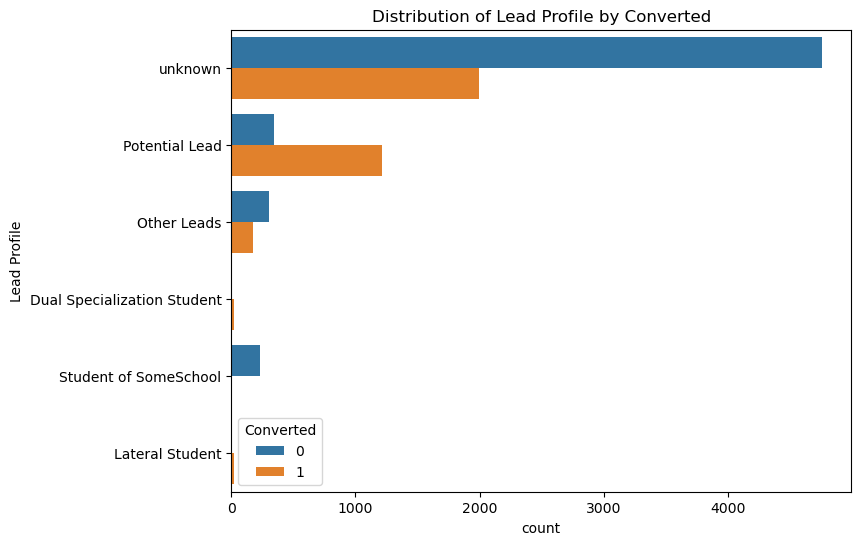

----------------------------------------
Frequency Count for Lead Profile:
╒═════════════════════════════╤══════╤══════╕
│ Lead Profile                │    0 │    1 │
╞═════════════════════════════╪══════╪══════╡
│ Dual Specialization Student │    0 │   20 │
├─────────────────────────────┼──────┼──────┤
│ Lateral Student             │    0 │   21 │
├─────────────────────────────┼──────┼──────┤
│ Other Leads                 │  305 │  177 │
├─────────────────────────────┼──────┼──────┤
│ Potential Lead              │  341 │ 1213 │
├─────────────────────────────┼──────┼──────┤
│ Student of SomeSchool       │  231 │    8 │
├─────────────────────────────┼──────┼──────┤
│ unknown                     │ 4754 │ 1994 │
╘═════════════════════════════╧══════╧══════╛

Percentage Distribution for Lead Profile:
╒═════════════════════════════╤═════════╤═══════════╕
│ Lead Profile                │       0 │         1 │
╞═════════════════════════════╪═════════╪═══════════╡
│ Dual Specialization Student 

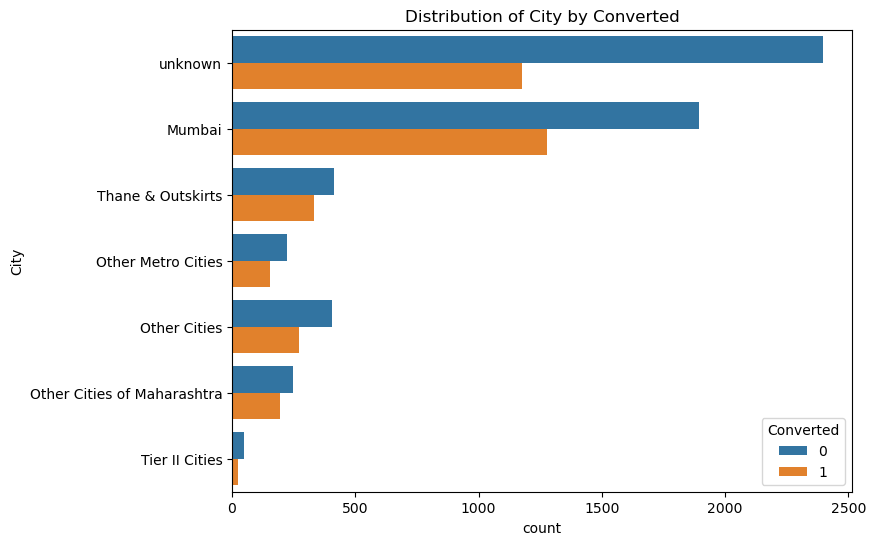

----------------------------------------
Frequency Count for City:
╒═════════════════════════════╤══════╤══════╕
│ City                        │    0 │    1 │
╞═════════════════════════════╪══════╪══════╡
│ Mumbai                      │ 1896 │ 1276 │
├─────────────────────────────┼──────┼──────┤
│ Other Cities                │  407 │  272 │
├─────────────────────────────┼──────┼──────┤
│ Other Cities of Maharashtra │  249 │  196 │
├─────────────────────────────┼──────┼──────┤
│ Other Metro Cities          │  223 │  154 │
├─────────────────────────────┼──────┼──────┤
│ Thane & Outskirts           │  412 │  332 │
├─────────────────────────────┼──────┼──────┤
│ Tier II Cities              │   49 │   25 │
├─────────────────────────────┼──────┼──────┤
│ unknown                     │ 2395 │ 1178 │
╘═════════════════════════════╧══════╧══════╛

Percentage Distribution for City:
╒═════════════════════════════╤═════════╤═════════╕
│ City                        │       0 │       1 │
╞═══════════

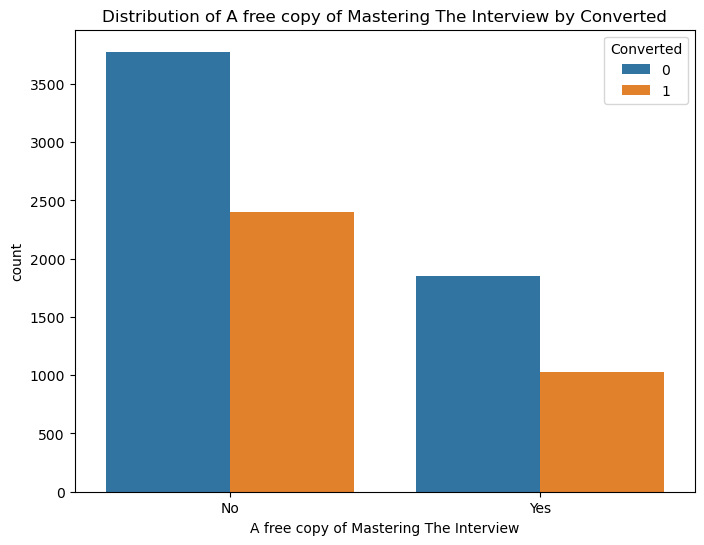

----------------------------------------
Frequency Count for A free copy of Mastering The Interview:
╒══════════════════════════════════════════╤══════╤══════╕
│ A free copy of Mastering The Interview   │    0 │    1 │
╞══════════════════════════════════════════╪══════╪══════╡
│ No                                       │ 3777 │ 2404 │
├──────────────────────────────────────────┼──────┼──────┤
│ Yes                                      │ 1854 │ 1029 │
╘══════════════════════════════════════════╧══════╧══════╛

Percentage Distribution for A free copy of Mastering The Interview:
╒══════════════════════════════════════════╤═════════╤═════════╕
│ A free copy of Mastering The Interview   │       0 │       1 │
╞══════════════════════════════════════════╪═════════╪═════════╡
│ No                                       │ 61.1066 │ 38.8934 │
├──────────────────────────────────────────┼─────────┼─────────┤
│ Yes                                      │ 64.308  │ 35.692  │
╘══════════════════════════

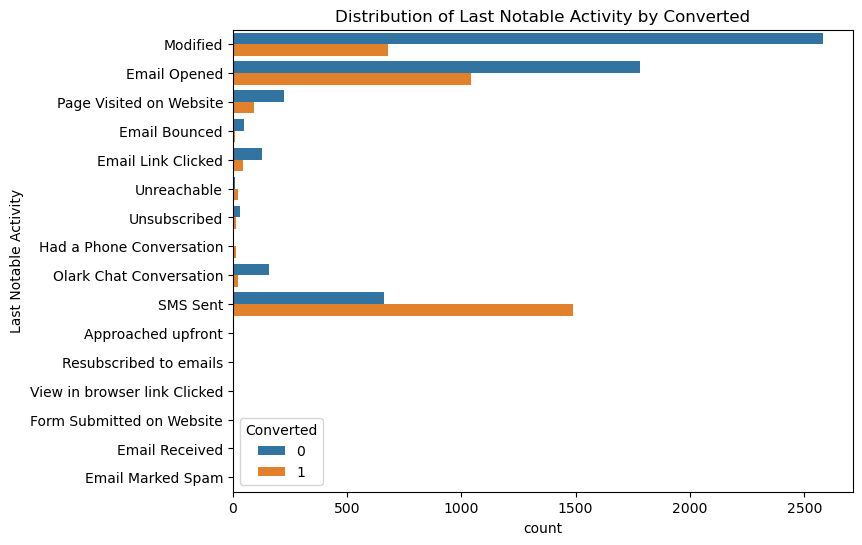

----------------------------------------
Frequency Count for Last Notable Activity:
╒══════════════════════════════╤══════╤══════╕
│ Last Notable Activity        │    0 │    1 │
╞══════════════════════════════╪══════╪══════╡
│ Approached upfront           │    0 │    1 │
├──────────────────────────────┼──────┼──────┤
│ Email Bounced                │   51 │    9 │
├──────────────────────────────┼──────┼──────┤
│ Email Link Clicked           │  128 │   45 │
├──────────────────────────────┼──────┼──────┤
│ Email Marked Spam            │    0 │    2 │
├──────────────────────────────┼──────┼──────┤
│ Email Opened                 │ 1781 │ 1042 │
├──────────────────────────────┼──────┼──────┤
│ Email Received               │    0 │    1 │
├──────────────────────────────┼──────┼──────┤
│ Form Submitted on Website    │    1 │    0 │
├──────────────────────────────┼──────┼──────┤
│ Had a Phone Conversation     │    1 │   13 │
├──────────────────────────────┼──────┼──────┤
│ Modified             

In [36]:
# Looping through each categorical column and analyze it with respect to the 'TARGET' variable
for column in leads_data.select_dtypes(include=['object', 'category']):
    try:
        if column == 'Converted':
            continue

        # Frequency count of categories with respect to the target variable
        category_counts = leads_data.groupby(column)['Converted'].value_counts().unstack(fill_value=0)

        # Create a bar plot to visualize the distribution of categories based on the target variable

        plt.figure(figsize=(8, 6))
        if len(leads_data[column].unique()) > 5:
            sns.countplot(data=leads_data, y=column, hue='Converted')
        else:
            sns.countplot(data=leads_data, x=column, hue='Converted')
        plt.title(f'Distribution of {column} by Converted')
        plt.show()
        
        # Percentage distribution of categories with respect to the target variable
        percentage_distribution = category_counts.div(category_counts.sum(axis=1), axis=0)*100

        # Print the frequency count and percentage distribution in a more readable format
        from tabulate import tabulate

        # Convert DataFrames to a tabular format
        category_counts_table = tabulate(category_counts, headers='keys', tablefmt='fancy_grid')
        percentage_distribution_table = tabulate(percentage_distribution, headers='keys', tablefmt='fancy_grid')

        # Print the formatted tables
        print('-' * 40)
        print(f'Frequency Count for {column}:\n{category_counts_table}')
        print(f'\nPercentage Distribution for {column}:\n{percentage_distribution_table}')
        print('-' * 40)
    except Exception as e:
        continue

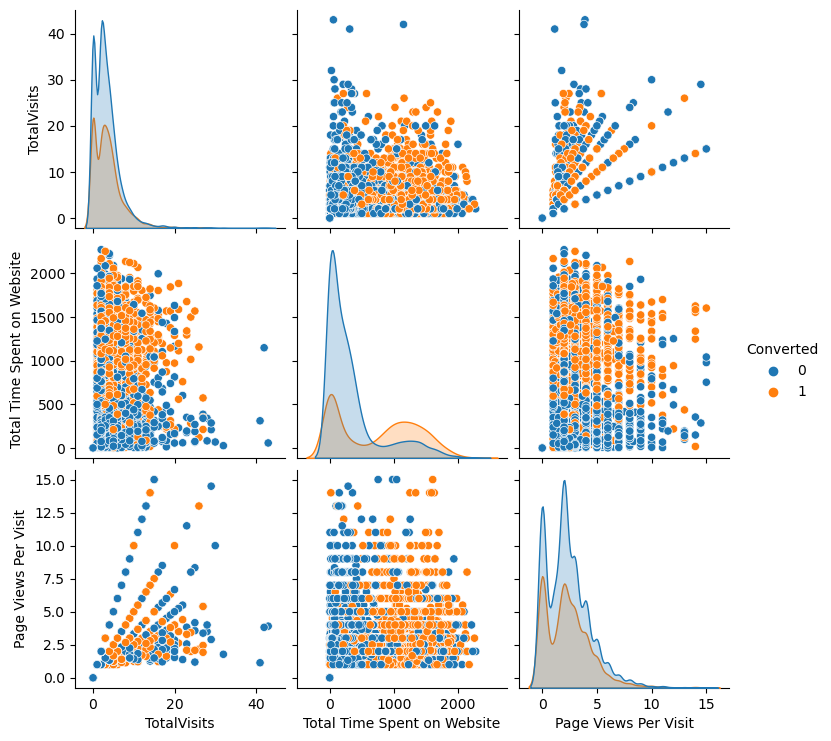

In [37]:
# Plotting the numerical data w.r.t Target Variable

sns.pairplot(leads_data, hue='Converted')
plt.show()

**Data Visualization Inference:**

**1. Lead Origin:**
- Majority of leads are originated from "Landing Page Submission" and "API."
- Leads from "Lead Add Form" have a higher conversion rate, even though the lead count is less.

**2. Lead Source:**
- Majority of leads are from "Google," "Direct Traffic," "Olark Chat," and "Organic Search."
- "Google" has a higher conversion rate and is a significant source of leads.

**3. Country:**
- Majority of leads belong to "India."

**4. Specialization:**
- A significant portion of the data has unknown values for specialization.
- Leads are majorly from specializations like "Finance," "HR," and "Marketing."

**5. Occupation:**
- Majority of leads are categorized as "Unemployed."
- Conversion rate is higher for leads who are "Working Professionals."

**6. Reason for Choosing the Course:**
- Majority of leads are choosing the course for "Better Career Prospects."

**7. City:**
- Majority of leads are from "Mumbai."

**8. Last Activity:**
- Conversion rate is higher for leads with the last activity as "SMS Sent."
- Conversion rate is lower when the last activity is "Olark Chat Conversation."

**9. Tags:**
- Leads with the tag "Student" have almost negligible conversion.
- Higher conversion rates for tags like "Closed by Horizzon," "Lost to EINS," and "Will revert after reading the email."

**10. Total Time Spent on the Website:**
- Leads who spend more time on the website or have higher total visits show a higher conversion rate.

Also we see that there is **high correlation** between **"TotalVisit" and "Page Views per Visit"**

These visualizations and inferences can guide the marketing and sales strategies, helping focus efforts on sources, activities, and attributes that have higher conversion rates. It is crucial for making data-driven decisions to enhance lead conversion.

### <a id='step2'></a> Preparing the data for modelling

#### <a id='step2.1'></a> Importing required libraries for Data Modelling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#### <a id='step2.2'></a> Convert the categorical feature into binary data by using dummy variables

In [39]:
# Encoding binary categorical to 1 and 0

leads_data['Do Not Email'] = leads_data['Do Not Email'].map({'No': 0, 'Yes': 1})
leads_data['Through Recommendations'] = leads_data['Through Recommendations'].map({'No': 0, 'Yes': 1})
leads_data['A free copy of Mastering The Interview'] = leads_data['A free copy of Mastering The Interview'].map({'No': 0, 
                                                                                                                 'Yes': 1})

In [40]:
# Encoding other categorical variable to dummy variable

for col in ['Lead Origin', 'Lead Source',  'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 
            'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City',
            'Last Notable Activity']:
    
    # Creating dummy columns for the categorical feature
    dummies = pd.get_dummies(leads_data[col], prefix = col, drop_first= True)
    
    # Concatenate the dummy variables with the original DataFrame
    leads_data = pd.concat([leads_data, dummies], axis=1)

    # Drop the original 'season' column
    leads_data.drop(col, axis=1, inplace=True)

leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup

In [41]:
# Check the shape of the data after adding dummies

leads_data.shape

(9064, 171)

**After converting the categorical variable to the form we need for modelling, we have 171 columns**

In [42]:
# Checking the sucessful lead conversion rate from the data

converted_rate = (sum(leads_data.Converted)/len(leads_data)) * 100
print(f'Successful convertion rate of this data is {round(converted_rate, 2)}')

Successful convertion rate of this data is 37.88


#### <a id='step2.3'></a> Split the data into train and test

In [43]:
# Splitting the dataset into train and test with 70:30 split

np.random.seed(0)
df_train, df_test = train_test_split(leads_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
# Checking the size of the data

print(df_train.shape)
print(df_test.shape)

(6344, 171)
(2720, 171)


**So there are 6344 records for training the model and 2720 records for testing the model**

#### <a id='step2.4'></a> Scale of features

In [45]:
# Initiating MinMaxScaler

scaler = MinMaxScaler()

In [46]:
# Applying scaling to all the columns except the 'dummy' variables

df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

In [47]:
# Checking the scaled data

df_train[numerical_columns].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2179,0.119048,0.051937,0.333333
3504,0.071429,0.186620,0.200000
5038,0.238095,0.574824,0.166667
3460,0.047619,0.290493,0.133333
7422,0.119048,0.072183,0.166667


In [48]:
# Checking the statistical description of the scaled data
df_train.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup

### <a id='step3'></a> Developing the model

In [49]:
# Importing libraries to build a logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics

#### <a id='step3.1'></a> Divide the independent variables and dependent variable

In [50]:
# Dividing the input and output

y_train = df_train.pop('Converted')
X_train = df_train

In [51]:
# Checking the data header of X train (independent variable)

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_swit

In [52]:
# Checking the data header of y train (dependent variable)

y_train.head()

2179    0
3504    0
5038    0
3460    0
7422    0
Name: Converted, dtype: int64

#### <a id='step3.2'></a> Auto-Select the independent features for the model

In [53]:
# Fitting the best line for the train set

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [54]:
# Using RFE feature selection method for auto selecting features

# Specifying the number of features to select
num_features_to_select = 15

# Initializing RFE
rfe = RFE(estimator=log_reg, n_features_to_select=num_features_to_select)

rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [55]:
# Listing down the columns selected by RFE with column ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 128),
 ('Through Recommendations', False, 143),
 ('A free copy of Mastering The Interview', False, 76),
 ('Lead Origin_Landing Page Submission', False, 41),
 ('Lead Origin_Lead Add Form', False, 50),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Source_Direct Traffic', False, 61),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 78),
 ('Lead Source_Live Chat', False, 142),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', False, 120),
 ('Lead Source_Organic Search', False, 79),
 ('Lead Source_Pay per Click Ads', False, 145),
 ('Lead Source_Press_Release', False, 148),
 ('Lead Source_Reference', False, 51),
 ('Lead Source_Referral Sites', False, 77),
 ('Lead Source_Social Media', False, 113),
 ('Lead Source_WeLearn', False, 135),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 134),
 ('Lead Sourc

In [56]:
# selecting the feature from RFE selected col list

significant_cols = X_train.columns[rfe.support_]
significant_cols

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_unknown',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified'],
      dtype='object')

In [57]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=155)

In [58]:
# Creating a dataframe with RFE Selected Columns

X_train_rfe = X_train[significant_cols]
X_train_rfe.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_switched off,Tags_unknown,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified
2179,0.051937,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3504,0.186620,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5038,0.574824,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3460,0.290493,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7422,0.072183,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# Defining a function to create Logistic Regression Model using Stats Model

def build_model(X_data, y_data):
    
    X_train_sm = sm.add_constant(X_data)
    log_model = sm.GLM(y_data, X_train_sm, family=sm.families.Binomial()).fit()
    print(log_model.summary())
    return log_model, X_train_sm

# Defining a function to calculate the VIF values

def CalculateVIF(data):
    
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

**Building Model - 1**

In [60]:
# Builing the first model

log_model_1, X_train_1 = build_model(X_train_rfe, y_train)
CalculateVIF(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.4
Date:                Wed, 10 Jan 2024   Deviance:                       2254.9
Time:                        09:34:16   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6209
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

,Features,VIF
12,Tags_unknown,5.46
3,What matters most to you in choosing a course_...,5.03
0,Total Time Spent on Website,1.86
8,Tags_Will revert after reading the email,1.71
2,Last Activity_SMS Sent,1.65
14,Last Notable Activity_Modified,1.45
7,Tags_Ringing,1.17
1,Lead Source_Welingak Website,1.13
6,Tags_Lost to EINS,1.11
5,Tags_Closed by Horizzon,1.09


In [61]:
# As Tags_unknown has VIF greater than 5, removing it.

X_train_rfe.drop(['Tags_unknown'], axis = 1, inplace=True)

#### <a id='step3.3'></a> Fine-tuning the model

**Building Model - 2**

In [62]:
# Builing the second model

log_model_2, X_train_2 = build_model(X_train_rfe, y_train)
CalculateVIF(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1332.9
Date:                Wed, 10 Jan 2024   Deviance:                       2665.9
Time:                        09:34:16   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5956
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

,Features,VIF
0,Total Time Spent on Website,1.78
8,Tags_Will revert after reading the email,1.63
2,Last Activity_SMS Sent,1.58
13,Last Notable Activity_Modified,1.44
3,What matters most to you in choosing a course_...,1.41
7,Tags_Ringing,1.16
5,Tags_Closed by Horizzon,1.08
4,Tags_Busy,1.06
6,Tags_Lost to EINS,1.06
1,Lead Source_Welingak Website,1.04


In [63]:
# As Tags_Busy has p-value greater than 0.05, removing it.

X_train_rfe.drop(['Tags_Busy'], axis = 1, inplace=True)

**Building Model - 3**

In [64]:
# Builing the third model

log_model_3, X_train_3 = build_model(X_train_rfe, y_train)
CalculateVIF(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1333.0
Date:                Wed, 10 Jan 2024   Deviance:                       2666.1
Time:                        09:34:16   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5956
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

,Features,VIF
0,Total Time Spent on Website,1.74
7,Tags_Will revert after reading the email,1.60
2,Last Activity_SMS Sent,1.53
12,Last Notable Activity_Modified,1.44
3,What matters most to you in choosing a course_...,1.40
6,Tags_Ringing,1.15
4,Tags_Closed by Horizzon,1.08
5,Tags_Lost to EINS,1.05
1,Lead Source_Welingak Website,1.04
10,Tags_switched off,1.03


In [65]:
# As Tags_in touch with EINS has p-value greater than 0.05, removing it.

X_train_rfe.drop(['Tags_in touch with EINS'], axis = 1, inplace=True)

**Building Model - 4**

In [66]:
# Builing the fourth model

log_model_4, X_train_4 = build_model(X_train_rfe, y_train)
CalculateVIF(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1333.8
Date:                Wed, 10 Jan 2024   Deviance:                       2667.5
Time:                        09:34:16   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5955
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

,Features,VIF
0,Total Time Spent on Website,1.74
7,Tags_Will revert after reading the email,1.60
2,Last Activity_SMS Sent,1.53
11,Last Notable Activity_Modified,1.44
3,What matters most to you in choosing a course_...,1.40
6,Tags_Ringing,1.15
4,Tags_Closed by Horizzon,1.08
5,Tags_Lost to EINS,1.05
1,Lead Source_Welingak Website,1.04
9,Tags_switched off,1.03


**As we see that for this model**

- VIF for all the features are well below 5.
- P-value for all the features are well below 0.05.

We can consider this model as a good model to predict the target variable

**Model Evaluation**

In [67]:
def Log_reg_Metrics(model, independent_data, dependent_data, class_threshold):
    
    class_prob = model.predict(independent_data)
    prediction_matrix = pd.DataFrame({dependent_data.name: dependent_data.values, 'Probability': class_prob})
    prediction_matrix['Prediction'] = prediction_matrix.Probability.map(lambda x: 1 if x > class_threshold else 0)
    confusion_matrix = metrics.confusion_matrix(prediction_matrix[dependent_data.name], prediction_matrix.Prediction)
    
    # Print confusion matrix as a DataFrame
    print("Confusion Matrix:")
    print(pd.DataFrame(confusion_matrix, 
                       columns=['Predicted Negative', 'Predicted Positive'], 
                       index=['Actual Negative', 'Actual Positive']))
    
    model_accuracy = round(metrics.accuracy_score(prediction_matrix[dependent_data.name], prediction_matrix.Prediction), 2)   
    model_recall = round(metrics.recall_score(prediction_matrix[dependent_data.name], prediction_matrix.Prediction), 2)
    model_precision = round(metrics.precision_score(prediction_matrix[dependent_data.name], prediction_matrix.Prediction), 2)
    model_f1_score = round(metrics.f1_score(prediction_matrix[dependent_data.name], prediction_matrix.Prediction), 2)
    
    tn, fp, fn, tp = confusion_matrix.ravel()
    model_Specificity = round(tn / (tn + fp), 2)
    
    # Printing all the metrics required
    
    print('\n')
    print(f'The model has an Accuracy of {model_accuracy:.2f} for class threshold - {class_threshold}')
    print(f'The model has a Precision of {model_precision:.2f} for class threshold - {class_threshold}')
    print(f'The model has a Recall of {model_recall:.2f} for class threshold - {class_threshold}')
    print(f'The model has a Specificity of {model_Specificity:.2f} for class threshold - {class_threshold}')
    print(f'The model has an F1 Score of {model_f1_score:.2f} for class threshold - {class_threshold}')

    return prediction_matrix


In [69]:
# Using the above function to evaluate the built model on train dataset at Threshold 0.5 to start with

pred_matrix  = Log_reg_Metrics(log_model_4, X_train_4, y_train, 0.5)

# Calculating the Lead Score from the probability

pred_matrix['Lead Score'] = pred_matrix['Probability'] * 100
pred_matrix.head()

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                3789                 161
Actual Positive                 327                2067


The model has an Accuracy of 0.92 for class threshold - 0.5
The model has a Precision of 0.93 for class threshold - 0.5
The model has a Recall of 0.86 for class threshold - 0.5
The model has a Specificity of 0.96 for class threshold - 0.5
The model has an F1 Score of 0.89 for class threshold - 0.5


,Converted,Probability,Prediction,Lead Score
2179,0,0.067731,0,6.773097
3504,0,0.007285,0,0.728470
5038,0,0.525346,1,52.534618
3460,0,0.063613,0,6.361344
7422,0,0.188184,0,18.818429


In [71]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(11)]

for i in numbers: 
    pred_matrix[i] = pred_matrix.Probability.map(lambda x:1 if x>i else 0) 

pred_matrix.head()

,Converted,Probability,Prediction,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
2179,0,0.067731,0,6.773097,1,0,0,0,0,0,0,0,0,0,0
3504,0,0.007285,0,0.728470,1,0,0,0,0,0,0,0,0,0,0
5038,0,0.525346,1,52.534618,1,1,1,1,1,1,0,0,0,0,0
3460,0,0.063613,0,6.361344,1,0,0,0,0,0,0,0,0,0,0
7422,0,0.188184,0,18.818429,1,1,0,0,0,0,0,0,0,0,0


In [72]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]

for i in num:
    cm1 = metrics.confusion_matrix(pred_matrix.Converted, pred_matrix[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.377364     1.000000     0.000000
0.1          0.1  0.836223     0.967419     0.756709
0.2          0.2  0.889502     0.926065     0.867342
0.3          0.3  0.918348     0.906433     0.925570
0.4          0.4  0.922919     0.883041     0.947089
0.5          0.5  0.923077     0.863409     0.959241
0.6          0.6  0.921028     0.846282     0.966329
0.7          0.7  0.908260     0.792398     0.978481
0.8          0.8  0.902585     0.761487     0.988101
0.9          0.9  0.888871     0.721387     0.990380
1.0          1.0  0.622636     0.000000     1.000000


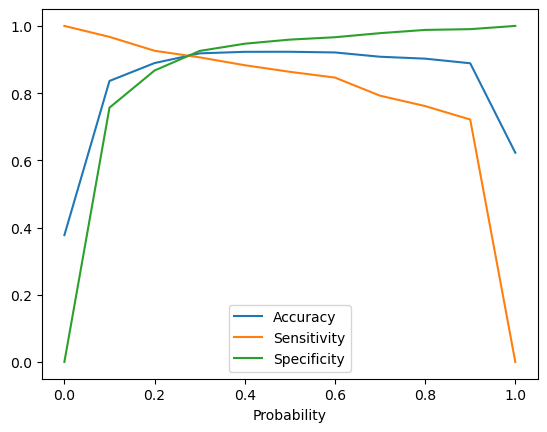

In [73]:
# plotting accuracy, sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='Probability', y= ['Accuracy','Sensitivity','Specificity'])
plt.show()

**We see that Specificity, Sensitivity and Accuracy has a good merge at Threshold approximately equal 0.25**

In [74]:
# Using the above function to evaluate the built model on train dataset

pred_matrix  = Log_reg_Metrics(log_model_4, X_train_4, y_train, 0.25)

# Calculating the Lead Score from the probability

pred_matrix['Lead Score'] = pred_matrix['Probability'] * 100
pred_matrix.head()

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                3579                 371
Actual Positive                 205                2189


The model has an Accuracy of 0.91 for class threshold - 0.25
The model has a Precision of 0.86 for class threshold - 0.25
The model has a Recall of 0.91 for class threshold - 0.25
The model has a Specificity of 0.91 for class threshold - 0.25
The model has an F1 Score of 0.88 for class threshold - 0.25


,Converted,Probability,Prediction,Lead Score
2179,0,0.067731,0,6.773097
3504,0,0.007285,0,0.728470
5038,0,0.525346,1,52.534618
3460,0,0.063613,0,6.361344
7422,0,0.188184,0,18.818429


In [75]:
# Defining the function to plot the ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

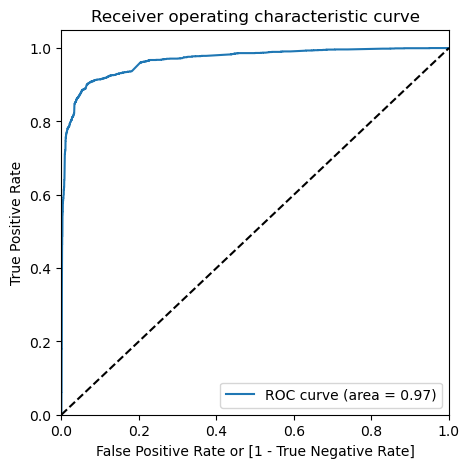

In [76]:
# Calling the function for ROC curve

draw_roc(pred_matrix.Converted, pred_matrix.Probability)

In [77]:
# Calculating the Precision and Recall at different point

p, r, thresholds = metrics.precision_recall_curve(pred_matrix.Converted, pred_matrix.Probability)

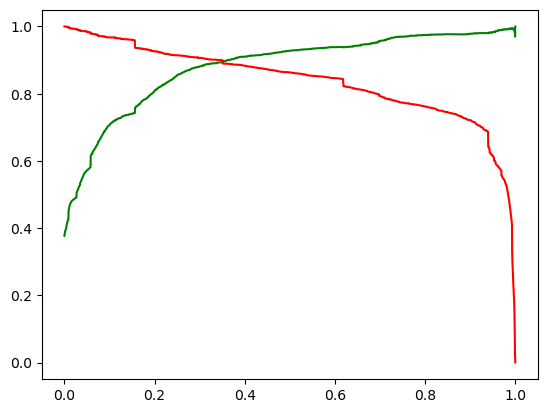

In [78]:
# Plotting the Precision and Recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### <a id='step4'></a> Prediction and evaluation on the test set

#### <a id='step4.1'></a> Rescale the test set

In [85]:
# Scaling the test dataset using MinMax scaler

df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

#### <a id='step4.2'></a> Model evaluation using test dataset

In [80]:
# Creating independent and dependent datasets from test dataset

y_test = df_test.pop('Converted')
X_test = df_test

In [81]:
# Checking the input test data

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_swit

In [82]:
# Checking the output test data

y_test.head()

5121    0
687     0
4091    1
738     1
5231    1
Name: Converted, dtype: int64

In [83]:
# Predicting the output for the test dataset using the finalised model

# Adding a constant column to the existing data
columns_without_const = [col for col in X_train_4.columns if col != 'const']
X_test_sm = sm.add_constant(X_test[columns_without_const])

In [84]:
pred_matrix_test  = Log_reg_Metrics(log_model_4, X_test_sm, y_test, 0.25)

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                1512                 169
Actual Positive                  67                 972


The model has an Accuracy of 0.91 for class threshold - 0.25
The model has a Precision of 0.85 for class threshold - 0.25
The model has a Recall of 0.94 for class threshold - 0.25
The model has a Specificity of 0.90 for class threshold - 0.25
The model has an F1 Score of 0.89 for class threshold - 0.25


## <a id='step5'></a> Model Summary

The logistic regression model was developed to classify the leads using various features. The model was trained and evaluated on both training and testing datasets. The key metrics evaluated at a **class threshold of 0.25** are summarized below:

**Training Set Metrics**

- **Accuracy:** 0.91
- **Precision:** 0.86
- **Recall:** 0.91
- **Specificity:** 0.91
- **F1 Score:** 0.88

**Testing Set Metrics**

- **Accuracy:** 0.91
- **Precision:** 0.85
- **Recall:** 0.94
- **Specificity:** 0.90
- **F1 Score:** 0.89

The model's consistent performance across both sets indicates its generalization capability and reliability. Notably, the F1 Score, a balanced measure of precision and recall, is high, suggesting an effective balance between identifying positive cases and minimizing false positives.


**Key Features Impacting Lead Conversion:**

The coefficients highlight the impact of each variable on lead conversion. 

Notable factors influencing positive lead outcomes include:

- Tags_Closed by Horizzon								:	7.0403
- Tags_Lost to EINS									    :	6.6737
- Lead Source_Welingak Website						    :	4.4936
- Tags_Will revert after reading the email			    :	4.4297
- Total Time Spent on Website							:	3.1102
- Last Activity_SMS Sent								:	2.1677

Conversely, negative impacts are observed for:

- Tags_invalid number									:	-4.3881
- Tags_switched off										:	-4.2877
- Tags_Ringing											:	-3.8087
- Lead Profile_Student of SomeSchool					:	-3.3241
- Last Notable Activity_Modified						:	-1.9063
- What matters most to you in choosing a course_unknown	:	-1.0973

The model identifies the importance of lead engagement indicators, website interactions, and specific tags in predicting conversions.

**Overall Implications:**

The logistic regression model, with its strong predictive ability and clear insights into influential features, provides actionable intelligence for lead prioritization. The company can use this information to focus resources on leads with high conversion potential, optimizing sales efforts and improving overall efficiency.